In [1]:
import os, sys
ROOT = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
if ROOT not in sys.path:
    sys.path.append(ROOT)
    
import src as src
from src import config, data_utils, preprocessing

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src import config, data_utils, preprocessing
from scipy.stats import chi2_contingency
from collections import defaultdict


In [3]:
app_train, app_test, column_descriptions = data_utils.get_datasets()

In [7]:
print(f"Train dataset shape: {app_train.shape}")

Train dataset shape: (50000, 54)


In [8]:
pd.set_option('display.max_columns', None)
display(app_train.head())


,ID_CLIENT,CLERK_TYPE,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,QUANT_ADDITIONAL_CARDS,POSTAL_ADDRESS_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,EDUCATION_LEVEL,STATE_OF_BIRTH,CITY_OF_BIRTH,NACIONALITY,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,FLAG_RESIDENCIAL_PHONE,RESIDENCIAL_PHONE_AREA_CODE,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_MOBILE_PHONE,FLAG_EMAIL,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OTHER_CARDS,QUANT_BANKING_ACCOUNTS,QUANT_SPECIAL_BANKING_ACCOUNTS,PERSONAL_ASSETS_VALUE,QUANT_CARS,COMPANY,PROFESSIONAL_STATE,PROFESSIONAL_CITY,PROFESSIONAL_BOROUGH,FLAG_PROFESSIONAL_PHONE,PROFESSIONAL_PHONE_AREA_CODE,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL_1,FLAG_HOME_ADDRESS_DOCUMENT,FLAG_RG,FLAG_CPF,FLAG_INCOME_PROOF,PRODUCT,FLAG_ACSP_RECORD,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET_LABEL_BAD=1
0,1,C,5,Web,0,1,F,6,1,0,RN,Assu,1,RN,Santana do Matos,Centro,Y,105,1.0,15.0,N,1,900.0,0.0,1,1,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,4.0,NaN,NaN,0,0,0,0,1,N,32,595,595,1
1,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.0,1.0,N,1,750.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,,NaN,NaN,N,,0,11.0,4.0,11.0,NaN,0,0,0,0,1,N,34,230,230,1
2,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.0,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,11.0,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
3,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0
4,5,C,10,Web,0,1,M,2,0,0,RJ,RIO DE JANEIRO,1,RJ,Rio de Janeiro,Santa Cruz,Y,20,1.0,12.0,N,1,1200.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,NaN,NaN,N,,0,9.0,5.0,NaN,NaN,0,0,0,0,1,N,48,235,235,1


In [5]:
with pd.option_context(
    'display.max_rows', None,
    'display.max_columns', None,
    'display.width', None,
    'display.max_colwidth', None
):
    display(app_train.head(5).T)

,0,1,2,3,4
ID_CLIENT,1,2,3,4,5
CLERK_TYPE,C,C,C,C,C
PAYMENT_DAY,5,15,5,20,10
APPLICATION_SUBMISSION_TYPE,Web,Carga,Web,Web,Web
QUANT_ADDITIONAL_CARDS,0,0,0,0,0
POSTAL_ADDRESS_TYPE,1,1,1,1,1
SEX,F,F,F,F,M
MARITAL_STATUS,6,2,2,2,2
QUANT_DEPENDANTS,1,0,0,0,0
EDUCATION_LEVEL,0,0,0,0,0


TARGET_LABEL  count  percentage
          NO  36959      73.918
         YES  13041      26.082


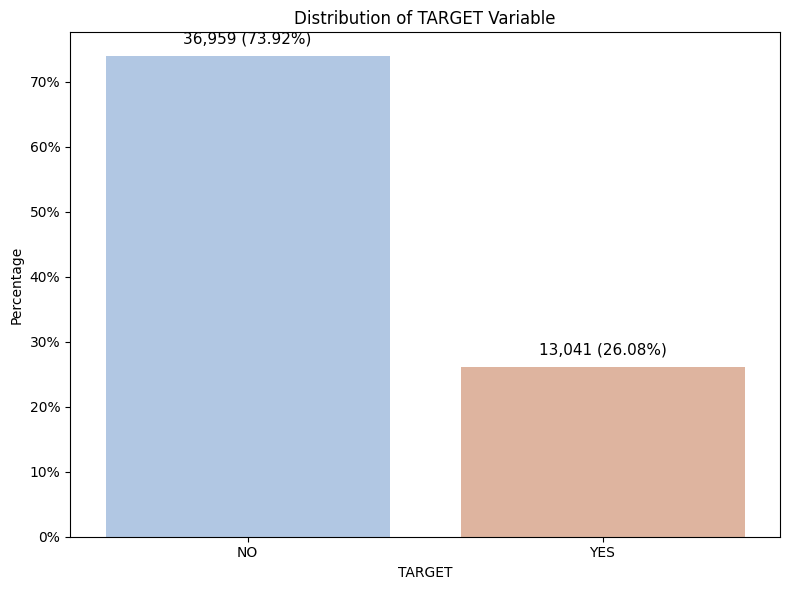

In [4]:
# Distribution of Target Variable (TARGET_LABEL_BAD=1)
app_train = app_train.rename(columns={'TARGET_LABEL_BAD=1': 'TARGET'})
target = app_train['TARGET'].map({0: 'NO', 1: 'YES'})

summary = (target.value_counts()
           .rename_axis('TARGET_LABEL')
           .to_frame('count')
           .assign(percentage=lambda df: df['count'] / df['count'].sum() * 100)
           .sort_index()
           .reset_index())
           #.reset_index().rename(columns={'index': 'TARGET'}))
print(summary.to_string(index=False))

order = ['NO', 'YES']
colors = ['#a8c6ec', '#e8b195']

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(data=summary, x='TARGET_LABEL', y='percentage', order=order, palette=colors, ax=ax)

for i, row in summary.set_index('TARGET_LABEL').loc[order].iterrows():
    ax.text(
        order.index(i),
        row["percentage"] + 1.5, 
        f"{int(row['count']):,} ({row['percentage']:.2f}%)", 
        ha='center', va='bottom', fontsize=11
    )

#sns.set_theme()
#ax = sns.barplot(data=summary, x='TARGET', y='percentage', palette='pastel')
ax.set_title('Distribution of TARGET Variable')
ax.set_xlabel('TARGET')
ax.set_ylabel('Percentage')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0f}%'))
plt.tight_layout()
plt.show()


In [11]:
# Showing number of columns by data type
(app_train.dtypes.astype(str).value_counts().rename_axis('dtype').to_frame('Columns'))

,Columns
dtype,
int64,25
object,20
float64,9


In [12]:
# Display amount of unique values for each categorical variable
cat_columns = app_train.select_dtypes(include=['object', 'category']).columns
n_labels = (app_train[cat_columns].nunique(dropna=True).sort_values(ascending=False))
n_labels.to_frame('Labels')


,Labels
RESIDENCIAL_BOROUGH,14511
CITY_OF_BIRTH,9910
PROFESSIONAL_BOROUGH,5057
RESIDENCIAL_CITY,3529
PROFESSIONAL_CITY,2236
PROFESSIONAL_ZIP_3,794
RESIDENCIAL_ZIP_3,794
RESIDENCIAL_PHONE_AREA_CODE,102
PROFESSIONAL_PHONE_AREA_CODE,87
STATE_OF_BIRTH,29


In [13]:
# Checking for missing values
missing_data = app_train.isna().mean().sort_values(ascending=False)
missing_data.head(20).to_frame('Missing Ratio')

,Missing Ratio
PROFESSIONAL_CITY,0.67566
PROFESSIONAL_BOROUGH,0.67566
EDUCATION_LEVEL_1,0.64676
MATE_PROFESSION_CODE,0.57768
PROFESSION_CODE,0.15512
OCCUPATION_TYPE,0.14626
MONTHS_IN_RESIDENCE,0.07554
RESIDENCE_TYPE,0.02698
PROFESSIONAL_PHONE_AREA_CODE,0.00000
QUANT_SPECIAL_BANKING_ACCOUNTS,0.00000


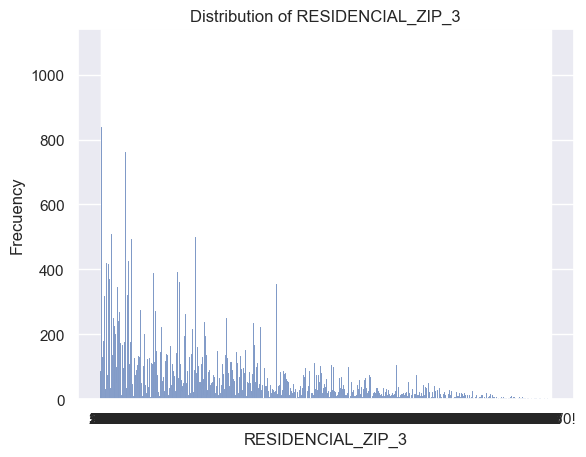

In [13]:
# Distribution of Residencial ZIP 
ax = sns.histplot(app_train['RESIDENCIAL_ZIP_3'], bins=10)
ax.set_title('Distribution of RESIDENCIAL_ZIP_3')
ax.set_xlabel('RESIDENCIAL_ZIP_3')
ax.set_ylabel('Frecuency')
ax.set_yscale('linear')
plt.show()

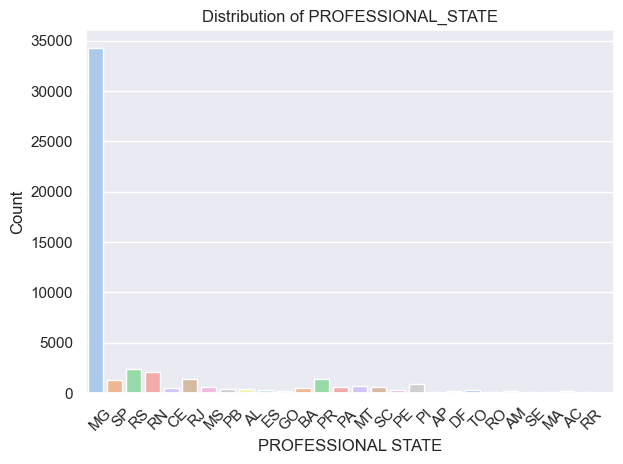

In [22]:
# Professional State
ax = sns.countplot(data=app_train, x='PROFESSIONAL_STATE', palette='pastel')
ax.set_title('Distribution of PROFESSIONAL_STATE')
ax.set_xlabel('PROFESSIONAL STATE')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

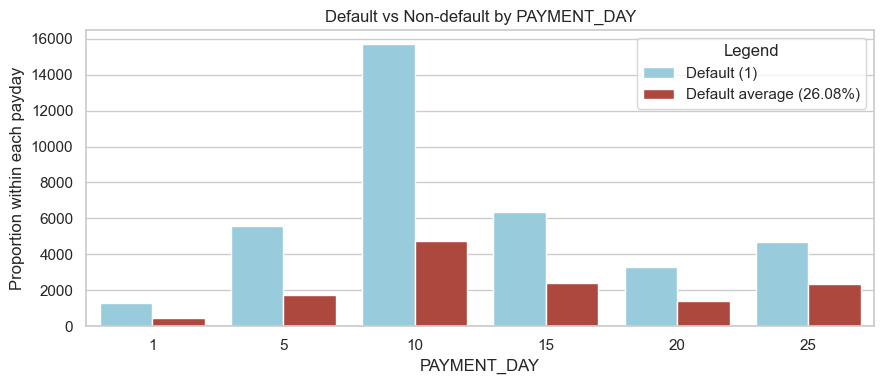

In [17]:
# Payment day vs Target
# Count and proportion by payday and target

payment_day_comp = (
    app_train.groupby(['PAYMENT_DAY', 'TARGET'])
    .size()
    .reset_index(name='count')
)
payment_day_comp['prop'] = payment_day_comp['count'] / payment_day_comp.groupby('PAYMENT_DAY')['count'].transform('sum')

avg_default = app_train['TARGET'].mean()

fig, ax = plt.subplots(figsize=(9,4))
sns.barplot(
    data=payment_day_comp,
    x='PAYMENT_DAY',
    #y='prop',
    y='count',
    hue='TARGET',
    palette={0: '#8dd1e7', 1: '#c0392b'},
    ax=ax
)
#ax.axhline(avg_default, color='red', linestyle='--', label=f'Promedio default ({avg_default:.2%})')
ax.set_ylabel('Proportion within each payday')
ax.set_xlabel('PAYMENT_DAY')
ax.set_title('Default vs Non-default by PAYMENT_DAY')
#ax.set_ylim(0, 1)
handles, labels = ax.get_legend_handles_labels()
# Adjusts TARGET=0/1 labels and maintains the average line
#custom_labels = ['No default (0)', 'Default (1)', f'Default average ({avg_default:.2%})']
custom_labels = ['Default (1)', f'Default average ({avg_default:.2%})']
ax.legend(handles=handles + [ax.lines[-1]], labels=custom_labels, title='Legend')
plt.tight_layout()
plt.show()

In [ ]:
sns.set(style="whitegrid")
avg_default = app_train['TARGET'].mean()

# Reusable color palettes
palette_default = {0: "#8dbeb0", 1: '#c0392b'}         # green/marron
palette_blues = {0: '#90caf9', 1: '#1565c0'}            # blues
palette_blue_red = {0: '#8dd1e7', 1: '#c0392b'}
palette_greys = {0: '#b0bec5', 1: '#455a64'}            # grays
palette_pinks = {0: '#f8bbd0', 1: '#c2185b'}            # pinks
palette_oranges = {0: "#9cc25e", 1: '#ef6c00'}          # oranges
palette_greens = {0: "#e2ae8a", 1: "#607b62"}             # greens/orange
palette_purples = {0: "#d89454", 1: "#b4b237"}              # purples/yellow

def plot_stacked(df, cat_col, title, order=None, figsize=(10,4), palette=None):
    palette = palette or palette_default 
    counts = (
        df.groupby([cat_col, 'TARGET'])
          .size()
          .reset_index(name='count')
    )
    counts['prop'] = counts['count'] / counts.groupby(cat_col)['count'].transform('sum')
    if order is not None:
        counts[cat_col] = pd.Categorical(counts[cat_col], categories=order, ordered=True)
    fig, ax = plt.subplots(figsize=figsize)
    #sns.barplot(data=counts, x=cat_col, y='prop', hue='TARGET', palette=palette, ax=ax)
    sns.barplot(data=counts, x=cat_col, y='count', hue='TARGET', palette=palette, ax=ax)
    #ax.axhline(avg_default, color='red', linestyle='--', label=f'Promedio default ({avg_default:.2%})')
    ax.set_title(title)
    ax.set_ylabel('Proportion within group')
    ax.set_xlabel(cat_col)
    #ax.set_ylim(0,1)
    handles, labels = ax.get_legend_handles_labels()
    #custom_labels = ['No default (0)', 'Default (1)', f'Promedio default ({avg_default:.2%})']
    custom_labels = ['Default (1)', f'Default average ({avg_default:.2%})']
    ax.legend(handles=handles + [ax.lines[-1]], labels=custom_labels, title='Leyenda', loc='lower right')
    plt.tight_layout()
    plt.show()

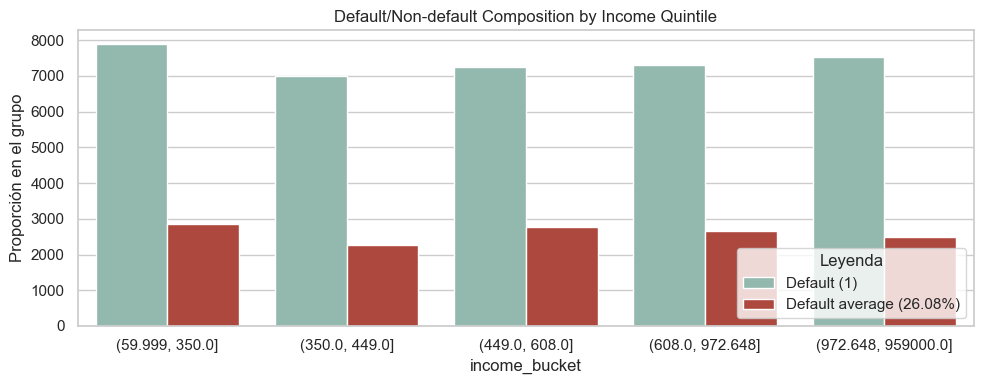

In [27]:
# Income quintiles

app_train['total_income'] = app_train['PERSONAL_MONTHLY_INCOME'].fillna(0) + app_train['OTHER_INCOMES'].fillna(0)
app_train['income_bucket'] = pd.qcut(app_train['total_income'], 5, duplicates='drop')
plot_stacked(app_train, 'income_bucket', 'Default/Non-default Composition by Income Quintile')


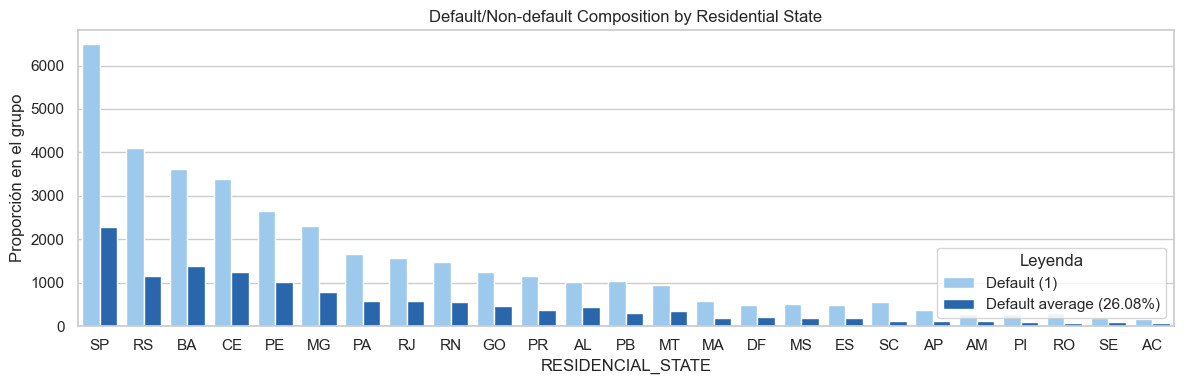

In [19]:
state_order = (
    app_train['RESIDENCIAL_STATE']
    .value_counts()
    .loc[lambda s: s >= 200]  # Frequency threshold
    .index
)
plot_stacked(app_train[app_train['RESIDENCIAL_STATE'].isin(state_order)],
             'RESIDENCIAL_STATE',
             'Default/Non-default Composition by Residential State',
             order=state_order,
             figsize=(12,4),
             palette=palette_blues)

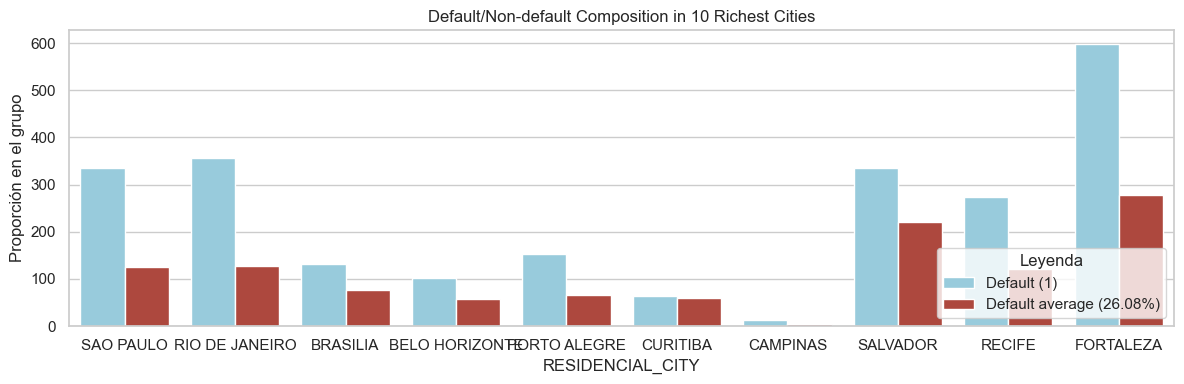

In [24]:
rich_cities = pd.DataFrame([
    ('SP', 'SAO PAULO'),
    ('RJ', 'RIO DE JANEIRO'),
    ('DF', 'BRASILIA'),
    ('MG', 'BELO HORIZONTE'),
    ('RS', 'PORTO ALEGRE'),
    ('PR', 'CURITIBA'),
    ('SP', 'CAMPINAS'),
    ('BA', 'SALVADOR'),
    ('PE', 'RECIFE'),
    ('CE', 'FORTALEZA'),
], columns=['RESIDENCIAL_STATE','RESIDENCIAL_CITY'])

mask = app_train.merge(rich_cities, on=['RESIDENCIAL_STATE','RESIDENCIAL_CITY'], how='inner')
city_order = rich_cities['RESIDENCIAL_CITY']
plot_stacked(mask, 'RESIDENCIAL_CITY',
             'Default/Non-default Composition in 10 Richest Cities',
             order=city_order,
             figsize=(12,4),
             palette=palette_blue_red)


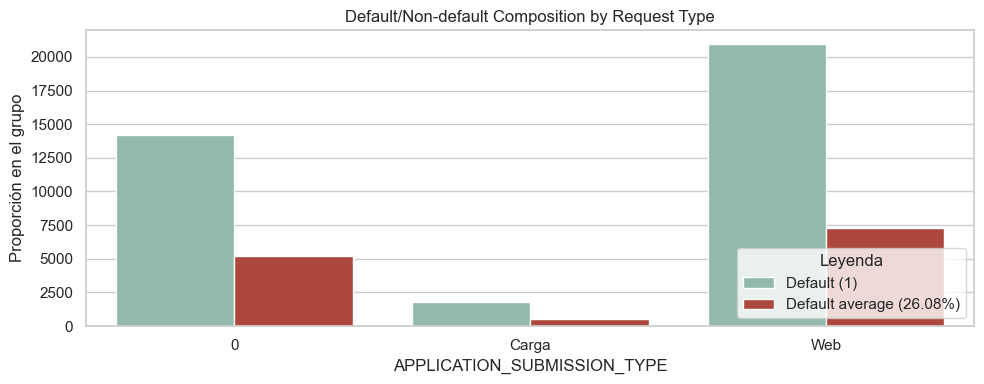

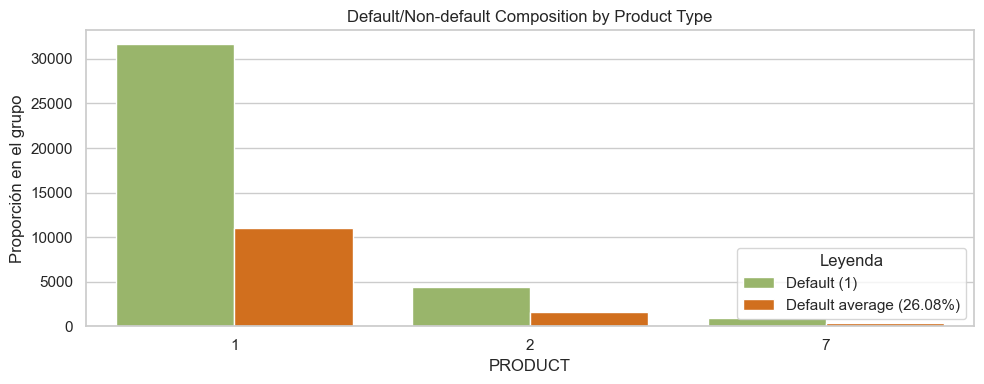

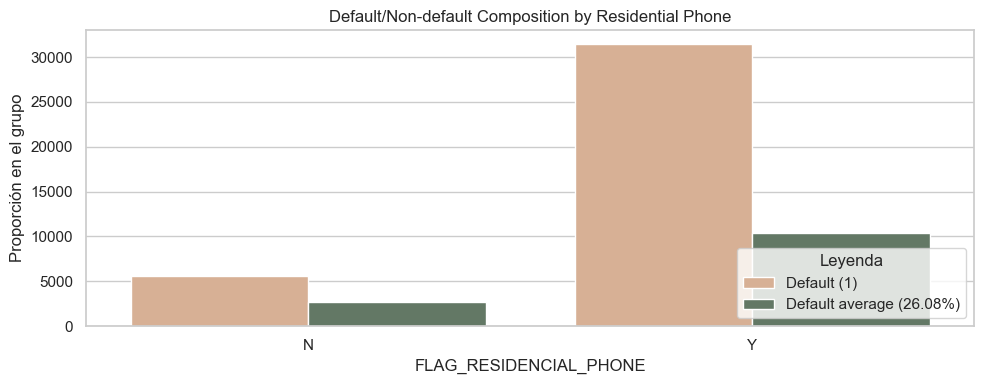

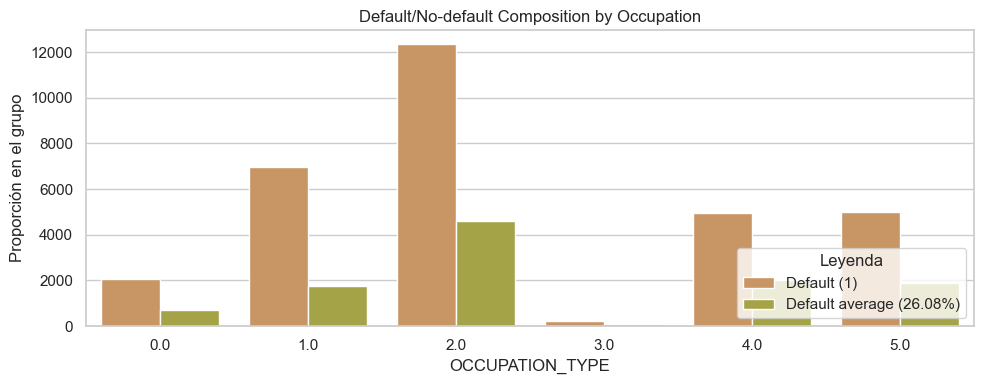

In [28]:
# Other categorical variables
# Default composition by request type
plot_stacked(app_train, 'APPLICATION_SUBMISSION_TYPE',
             'Default/Non-default Composition by Request Type')

# Default composition by product type
plot_stacked(app_train, 'PRODUCT',
             'Default/Non-default Composition by Product Type', palette=palette_oranges)

# Default composition by residential phone
plot_stacked(app_train, 'FLAG_RESIDENCIAL_PHONE',
             'Default/Non-default Composition by Residential Phone', palette=palette_greens)

# Default composition by occupation type
plot_stacked(app_train, 'OCCUPATION_TYPE',
             'Default/No-default Composition by Occupation', palette=palette_purples)


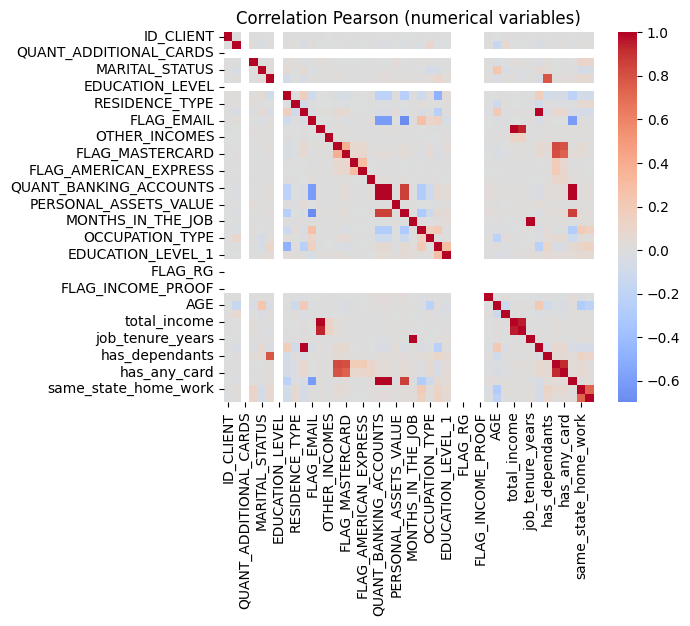

In [ ]:
app = app_train.copy()
app = app.rename(columns={'TARGET_LABEL_BAD=1': 'TARGET'})

app['total_income'] = app['PERSONAL_MONTHLY_INCOME'].fillna(0) + app['OTHER_INCOMES'].fillna(0)
app['income_per_dependant'] = app['total_income'] / app['QUANT_DEPENDANTS'].replace(0, 1)
app['job_tenure_years'] = app['MONTHS_IN_THE_JOB'] / 12
app['residence_years'] = app['MONTHS_IN_RESIDENCE'] / 12
app['has_dependants'] = (app['QUANT_DEPENDANTS'] > 0).astype(int)

app['total_cards'] = app[['FLAG_VISA', 'FLAG_MASTERCARD', 'FLAG_DINERS', 'FLAG_AMERICAN_EXPRESS', 'FLAG_OTHER_CARDS']].sum(axis=1)
app['has_any_card'] = (app['total_cards'] > 0).astype(int)
app['total_accounts'] = app[['QUANT_BANKING_ACCOUNTS', 'QUANT_SPECIAL_BANKING_ACCOUNTS']].sum(axis=1)

pay_bins = pd.qcut(app['PAYMENT_DAY'], q=4, duplicates='drop', retbins=True)
pay_labels = ['early', 'mid-early', 'mid_late', 'late'][:pay_bins[0].cat.categories.size]
app['payday_bucket'] = pay_bins[0].cat.set_categories(pay_labels, rename=True)
app['age_bucket'] = pd.cut(app['AGE'], bins=[0,25,35,50,200], labels=['<25','25-35','35-50','50+'])
app['job_tenure_bucket'] = pd.cut(app['job_tenure_years'], bins=[-np.inf,1,3,5,np.inf], labels=['<1y','1-3y','3-5y','5y+'])
app['residence_bucket'] = pd.cut(app['residence_years'], bins=[-np.inf,1,3,5,np.inf], labels=['<1y','1-3y','3-5y','5y+'])

app['same_state_home_work'] = (app['RESIDENCIAL_STATE'] == app['PROFESSIONAL_STATE']).astype(int)
app['smae_city_home_work'] = (app['RESIDENCIAL_CITY'] == app['PROFESSIONAL_CITY']).astype(int)

# Fast imputation for correlations (median num / mode cat)
num_cols = app.select_dtypes(include='number').columns
cat_cols = app.select_dtypes(exclude='number').columns


app[num_cols] = app[num_cols].fillna(app[num_cols].median())
app[cat_cols] = app[cat_cols].apply(lambda s: s.fillna(s.mode().iloc[0] if not s.mode().empty else s))

# Numerical correlation with target
corr = app[num_cols].corr(method='pearson')
corr_target = corr['TARGET'].drop("TARGET").sort_values()

sns.heatmap(corr, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Pearson (numerical variables)')
plt.show()

# Categorical correlation with target (Chi-squared)
def cramers_v(series, target):
    table = pd.crosstab(series, target)
    chi2 = chi2_contingency(table)[0]
    n = table.values.sum()
    r, k = table.shape
    phi2 = chi2 / n
    return np.sqrt(phi2 / max((min(k-1, r-1)), 1))

cramers = {c: cramers_v(app[c], app['TARGET']) for c in cat_cols}
pd.Series(cramers).sort_values(ascending=False).head(15).plot.barh(title='Top 15 Categorical Correlations with TARGET (Cramer\'s V)')
plt.show()

sample = app.sample(5000, random_state=42)
feat_plot = ['AGE', 'total_income', 'income_per_dependant', 'job_tenure_years', 'residence_years']
sns.pairplot(sample, vars=feat_plot, hue='TARGET', diag_kind='hist', plot_kws={'alpha':0.4, 's':20})
plt.show()

In [11]:
# DETECTION OF MISSING VALUES, CLEANING AND PREPROCESSING

df_work = app_train.copy()
counts = defaultdict(int)
new_cols = []

#Renaming duplicated columns
for c in df_work.columns:
    counts[c] +=1
    new_cols.append(f"{c}_{counts[c]-1}" if counts[c] > 1 else c)
df_work.columns = new_cols

target = "TARGET"
id_col = "ID_CLIENT"

# Standardizing null/missing values
df_work = df_work.replace({"?": np.nan, "NULL": np.nan, " ": np.nan})

#Converting "dirty" numeric columns to numeric (ajusting list if one is missing)
numeric_candidates = [
    "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "PERSONAL_ASSETS_VALUE",
    "MONTHS_IN_RESIDENCE", "MONTHS_IN_THE_JOB", "AGE",
    "QUANT_ADDITIONAL_CARDS", "QUANT_BANKING_ACCOUNTS",
    "QUANT_SPECIAL_BANKING_ACCOUNTS", "QUANT_DEPENDANTS", "QUANT_CARS",
    "PROFESSION_CODE", "MATE_PROFESSION_CODE"
]
for col in numeric_candidates:
    if col in df_work.columns:
        df_work[col] = pd.to_numeric(df_work[col], errors="coerce")

flag_mapping = {"YES": 1, "NO": 0, "S": 1, "0": 0, "1": 1, 0: 0, 1: 1}
binary_columns = [c for c in df_work.columns if c.startswith("FLAG_")]
for col in binary_columns:
    if col in df_work.columns:
        df_work[col] = df_work[col].map(flag_mapping)
        mask = ~df_work[col].isin([0, 1])
        # Setting values out of {0, 1} to NaN
        df_work.iloc[mask.values, df_work.columns.get_loc(col)] = np.nan


        

#Constant or quasi-constant columns
const_cols = [c for c in df_work.columns if df_work[c].nunique(dropna=False) == 1]
print("Columns to drop (const):", const_cols)
print("nunique por columna:\n", df_work[const_cols].nunique(dropna=False))

drop_manual = ["SEX", "NACIONALITY", "POSTAL_ADDRESS_TYPE", "RESIDENCIAL_PHONE_AREA_CODE","FLAG_RESIDENCIAL_PHONE", "STATE_OF_BIRTH", "CITY_OF_BIRTH"]

cols_to_drop = list(set(const_cols + drop_manual + [id_col]))
print("Columns to drop:", cols_to_drop)

cleaned_df = df_work.drop(columns=cols_to_drop, errors="ignore")
#cleaned_df.info()
cleaned_df.head(10)

Columns to drop (const): ['CLERK_TYPE', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_RESIDENCIAL_PHONE', 'FLAG_MOBILE_PHONE', 'FLAG_PROFESSIONAL_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'FLAG_RG', 'FLAG_CPF', 'FLAG_INCOME_PROOF', 'FLAG_ACSP_RECORD']
nunique por columna:
 CLERK_TYPE                    1
QUANT_ADDITIONAL_CARDS        1
EDUCATION_LEVEL               1
FLAG_RESIDENCIAL_PHONE        1
FLAG_MOBILE_PHONE             1
FLAG_PROFESSIONAL_PHONE       1
FLAG_HOME_ADDRESS_DOCUMENT    1
FLAG_RG                       1
FLAG_CPF                      1
FLAG_INCOME_PROOF             1
FLAG_ACSP_RECORD              1
dtype: int64
Columns to drop: ['FLAG_MOBILE_PHONE', 'FLAG_PROFESSIONAL_PHONE', 'FLAG_HOME_ADDRESS_DOCUMENT', 'RESIDENCIAL_PHONE_AREA_CODE', 'ID_CLIENT', 'CITY_OF_BIRTH', 'QUANT_ADDITIONAL_CARDS', 'EDUCATION_LEVEL', 'FLAG_INCOME_PROOF', 'CLERK_TYPE', 'FLAG_RESIDENCIAL_PHONE', 'FLAG_RG', 'POSTAL_ADDRESS_TYPE', 'STATE_OF_BIRTH', 'NACIONALITY', 'FLAG_ACSP_RECORD', 'SEX', 'FL

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,RESIDENCIAL_CITY,RESIDENCIAL_BOROUGH,RESIDENCE_TYPE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,...,MONTHS_IN_THE_JOB,PROFESSION_CODE,OCCUPATION_TYPE,MATE_PROFESSION_CODE,EDUCATION_LEVEL_1,PRODUCT,AGE,RESIDENCIAL_ZIP_3,PROFESSIONAL_ZIP_3,TARGET
0,5,Web,6,1,RN,Santana do Matos,Centro,1.0,15.0,1.0,...,0,9.0,4.0,NaN,NaN,1,32,595,595,1
1,15,Carga,2,0,RJ,RIO DE JANEIRO,CAMPO GRANDE,1.0,1.0,1.0,...,0,11.0,4.0,11.0,NaN,1,34,230,230,1
2,5,Web,2,0,RN,Parnamirim,Boa Esperanca,1.0,NaN,1.0,...,0,11.0,NaN,NaN,NaN,1,27,591,591,0
3,20,Web,2,0,PE,CABO,PONTE DOS CARVALHOS,NaN,NaN,1.0,...,0,NaN,NaN,NaN,NaN,1,61,545,545,0
4,10,Web,2,0,RJ,Rio de Janeiro,Santa Cruz,1.0,12.0,1.0,...,0,9.0,5.0,NaN,NaN,1,48,235,235,1
5,10,0,2,0,MG,ALFENAS,Campos Eliseos,1.0,4.0,1.0,...,0,9.0,2.0,0.0,0.0,2,40,371,371,1
6,15,Carga,2,2,BA,SALVADOR,VALERIA,1.0,1.0,1.0,...,0,11.0,4.0,11.0,NaN,1,40,413,413,1
7,25,Web,1,0,SP,Itapecerica da Serra,Lagoa,1.0,4.0,1.0,...,0,11.0,2.0,NaN,NaN,1,28,686,686,0
8,15,0,1,0,SP,MACATUBA,PLANALTO,1.0,0.0,1.0,...,0,0.0,2.0,0.0,0.0,2,31,172,172,0
9,5,0,1,0,RS,PORTO ALEGRE,BOM JESUS,1.0,5.0,1.0,...,0,9.0,2.0,11.0,0.0,1,41,914,914,0


Distribution of taget variable:
0    0.73918
1    0.26082
Name: TARGET, dtype: float64


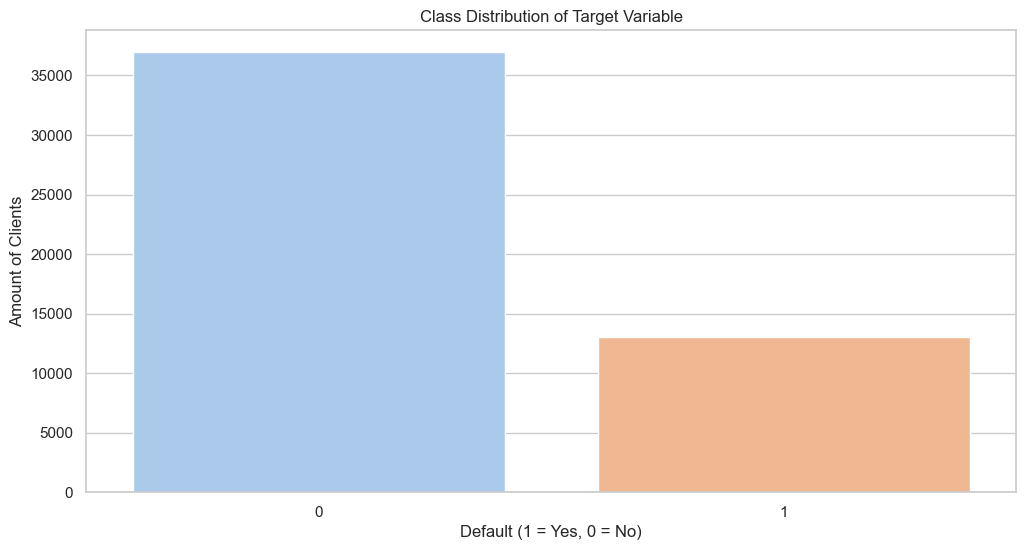


Resume of statistics for some key variables:


,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,MONTHS_IN_THE_JOB,QUANT_BANKING_ACCOUNTS
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,886.678437,35.434760,43.24852,0.009320,0.357840
std,7846.959327,891.515142,14.98905,0.383453,0.479953
min,60.000000,0.000000,6.00000,0.000000,0.000000
25%,360.000000,0.000000,31.00000,0.000000,0.000000
50%,500.000000,0.000000,41.00000,0.000000,0.000000
75%,800.000000,0.000000,53.00000,0.000000,1.000000
max,959000.000000,194344.000000,106.00000,35.000000,2.000000


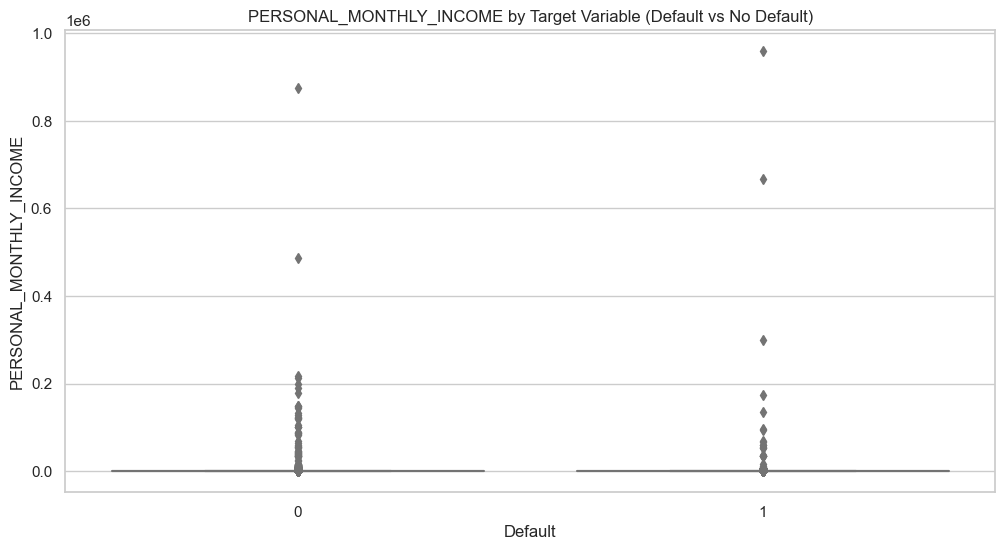

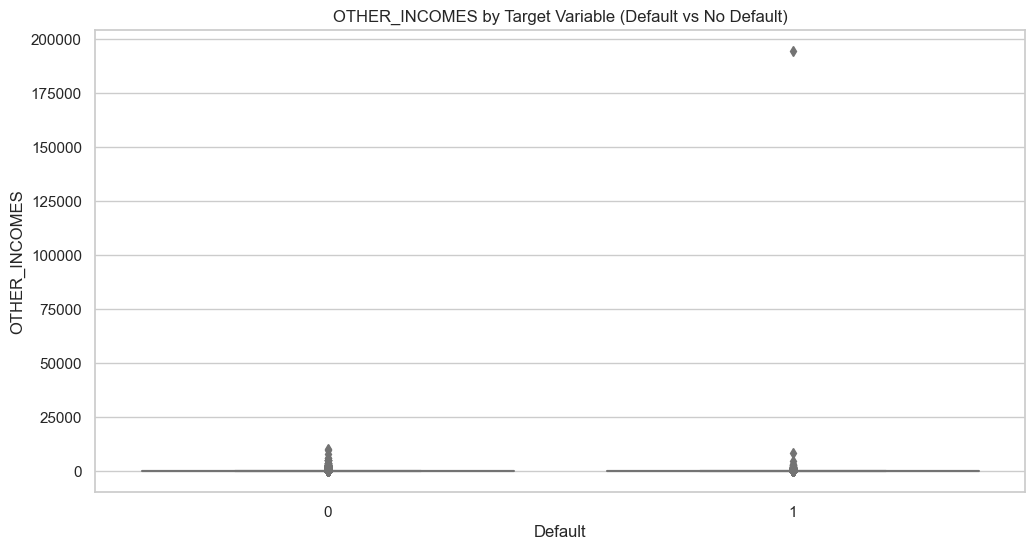

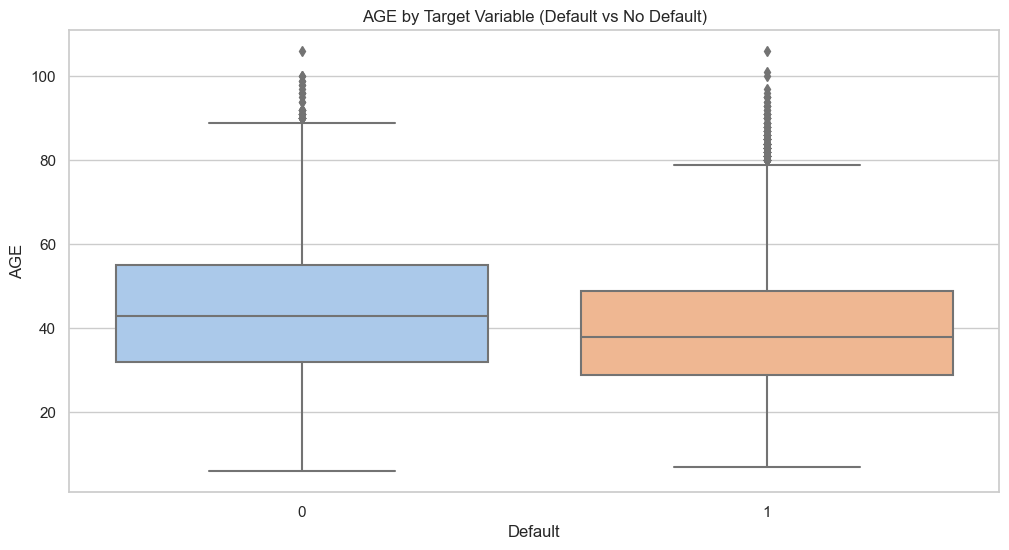

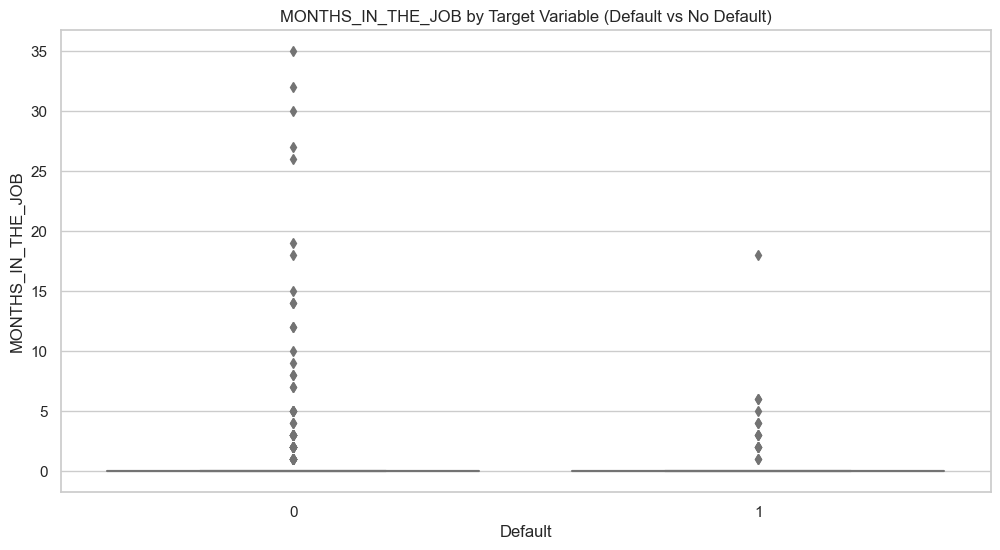

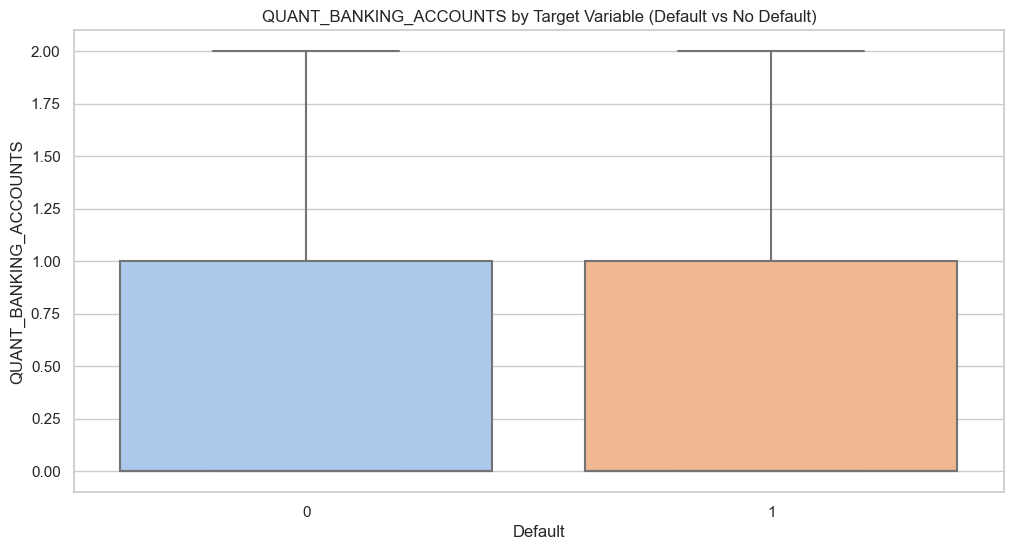

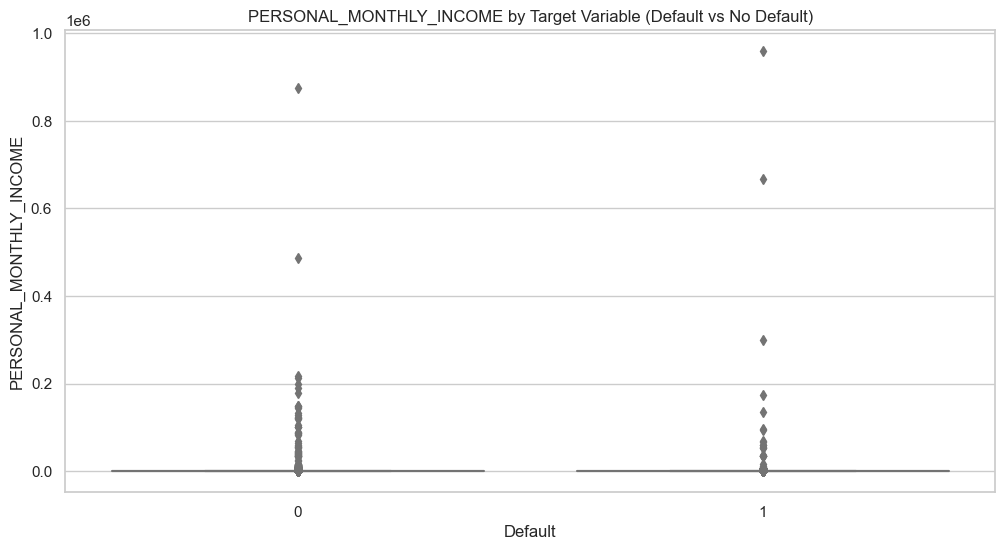

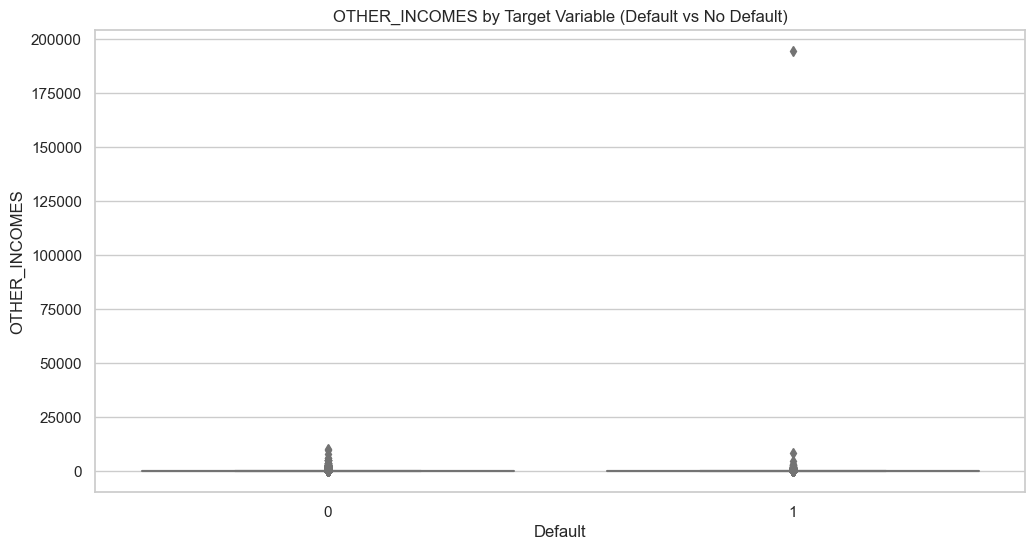

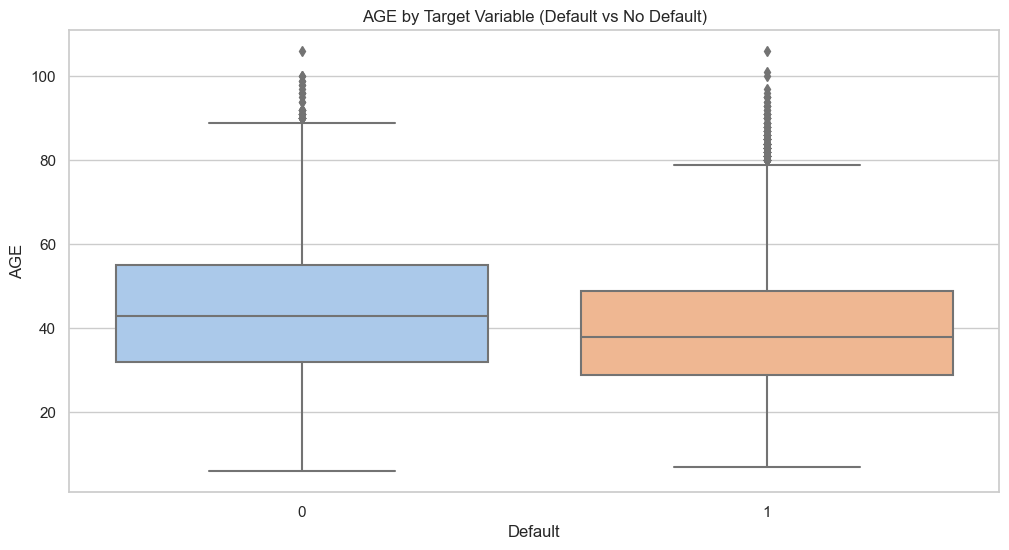

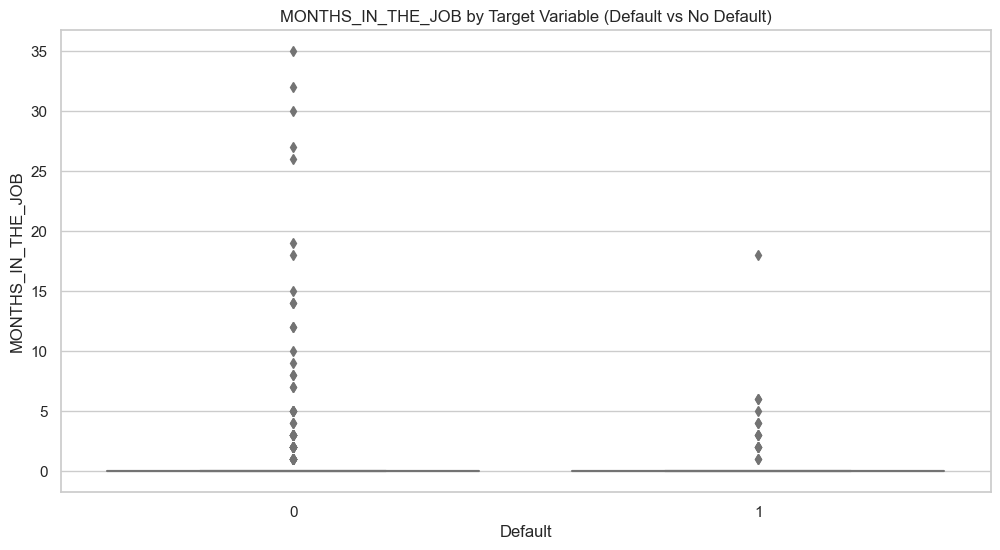

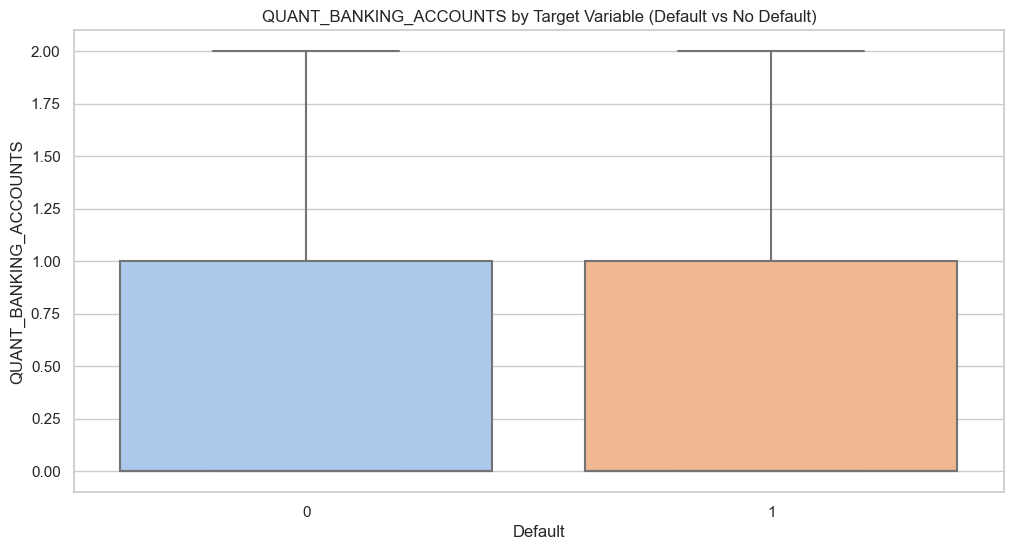

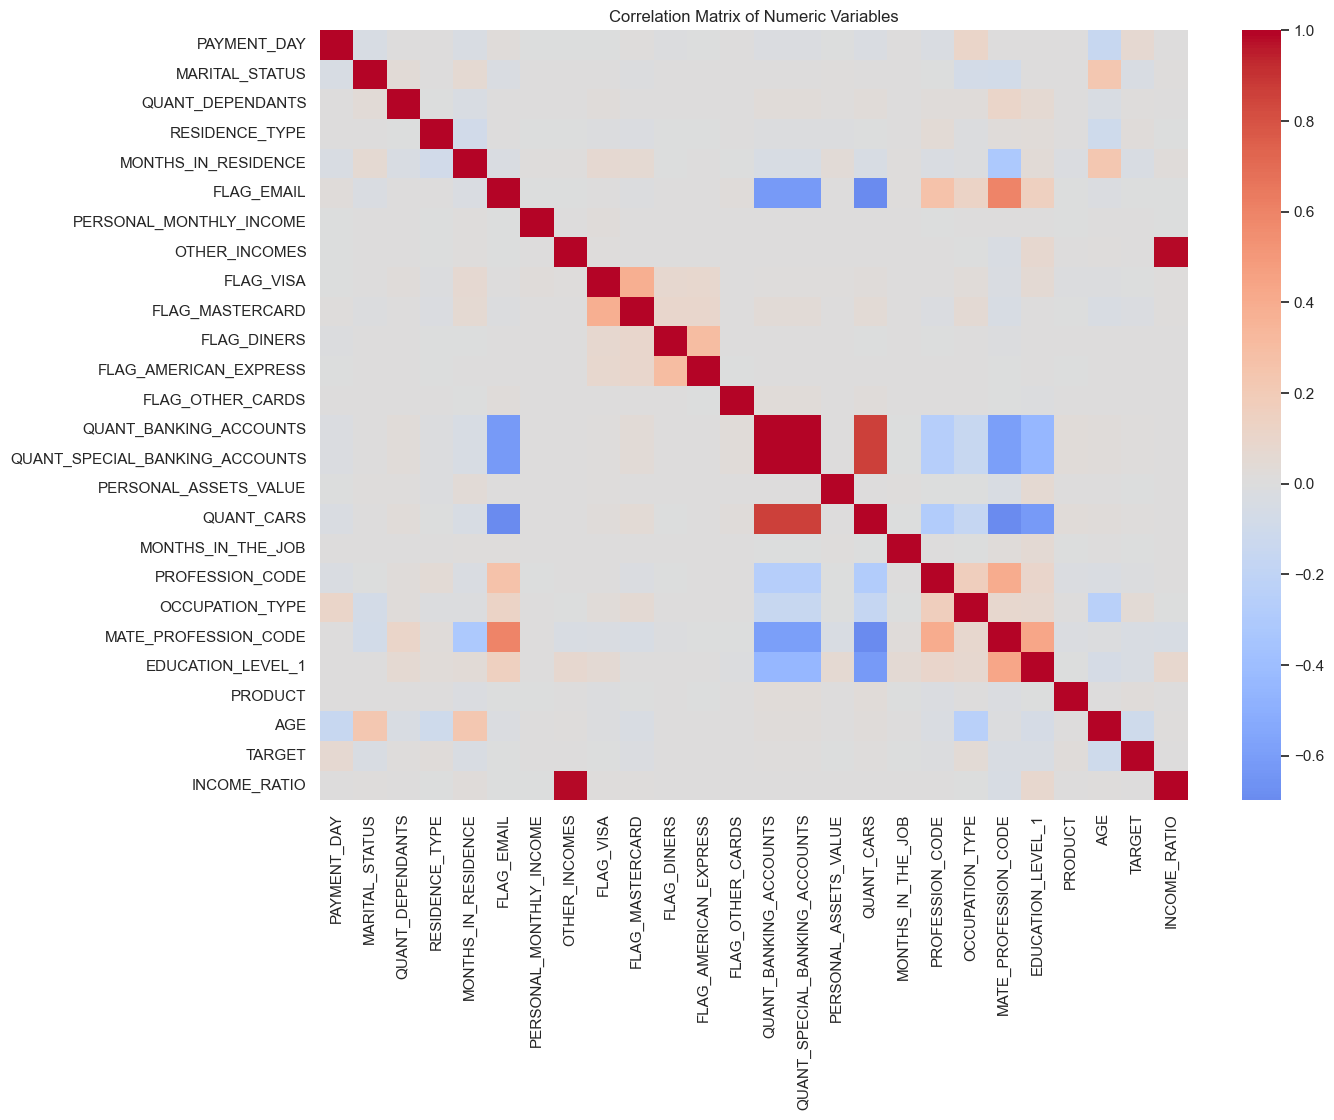

Average by target class (Default vs No Default):


,PERSONAL_MONTHLY_INCOME,OTHER_INCOMES,AGE,MONTHS_IN_THE_JOB,QUANT_BANKING_ACCOUNTS
TARGET,,,,,
0,873.540385,33.082406,44.209097,0.010931,0.354420
1,923.912488,42.101475,40.526187,0.004754,0.367533


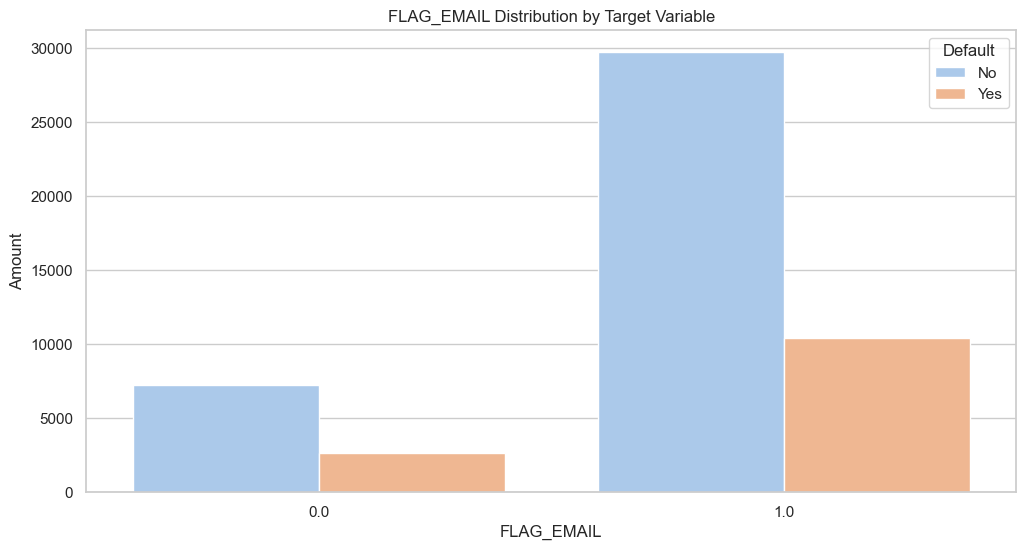

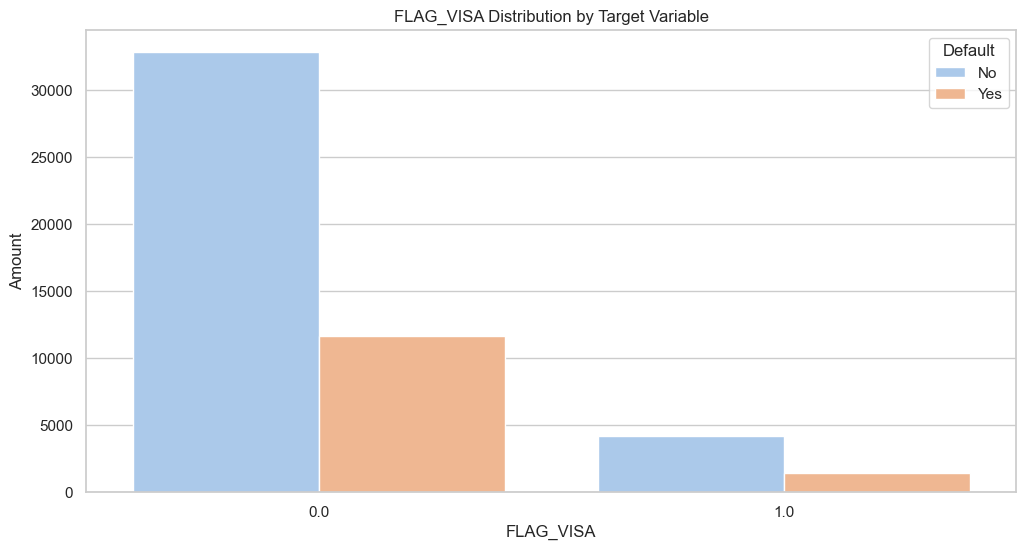

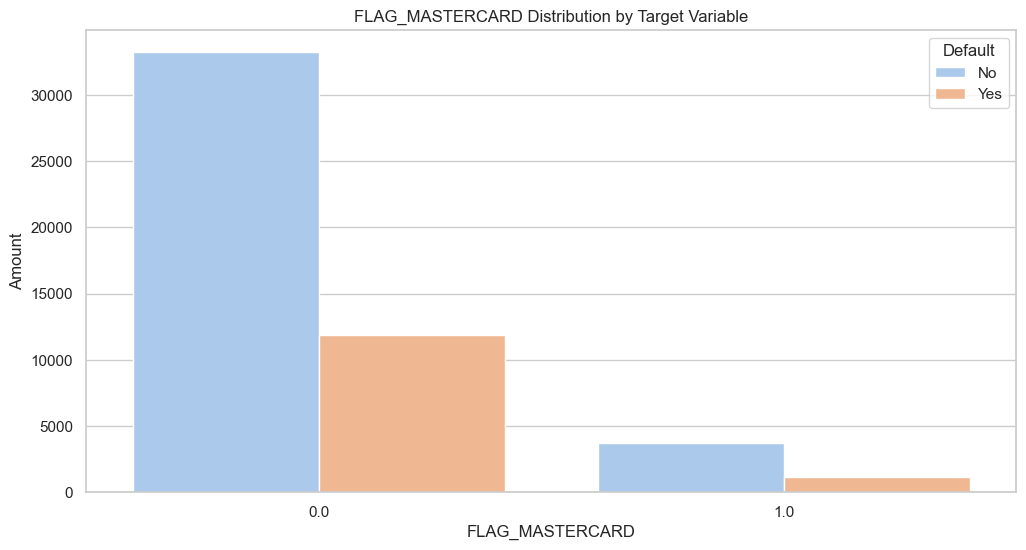

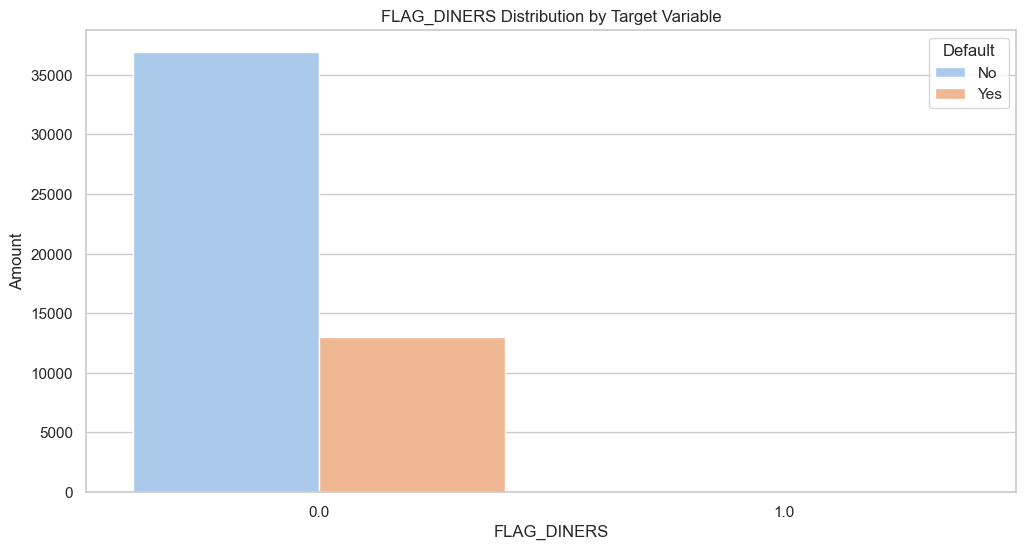

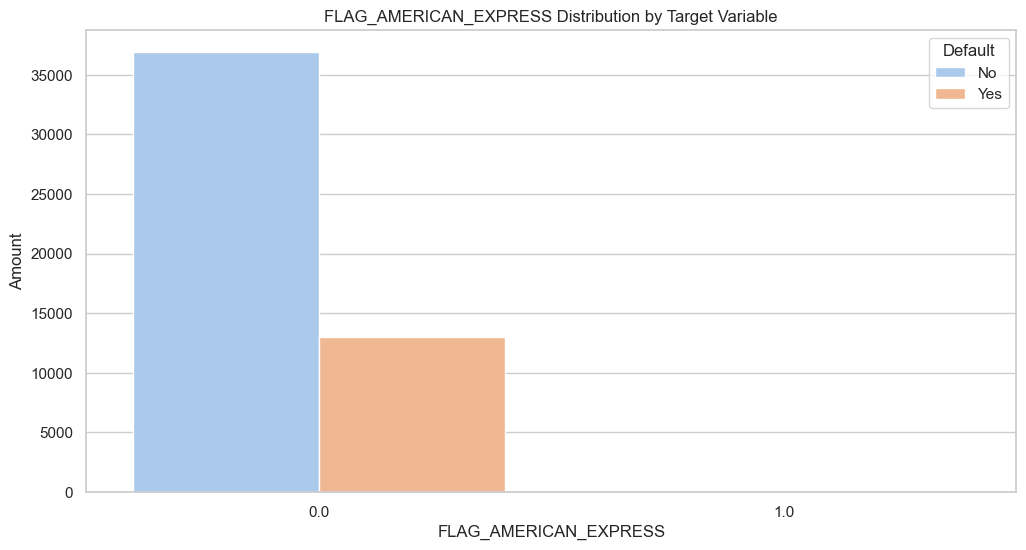

Distribution of APPLICATION_SUBMISSION_TYPE:
Web      28206
0        19461
Carga     2333
Name: APPLICATION_SUBMISSION_TYPE, dtype: int64


Distribution of RESIDENCIAL_STATE:
SP    8773
RS    5261
BA    4991
CE    4619
PE    3670
MG    3085
PA    2247
RJ    2143
RN    2027
GO    1694
PR    1523
AL    1467
PB    1361
MT    1301
MA     761
DF     700
MS     698
ES     688
SC     668
AP     493
AM     402
PI     374
RO     363
SE     273
AC     227
TO     130
RR      61
Name: RESIDENCIAL_STATE, dtype: int64


Distribution of RESIDENCIAL_CITY:
Sao Paulo               894
FORTALEZA               876
Fortaleza               714
MACEIO                  651
PELOTAS                 624
                       ... 
MEDEIROS N ETO            1
PARECI NOVO               1
CAPIM GROSSO              1
pauloa fonso              1
conselheiro lafaiete      1
Name: RESIDENCIAL_CITY, Length: 3529, dtype: int64


Distribution of RESIDENCIAL_BOROUGH:
CENTRO                                   4169
Centro    

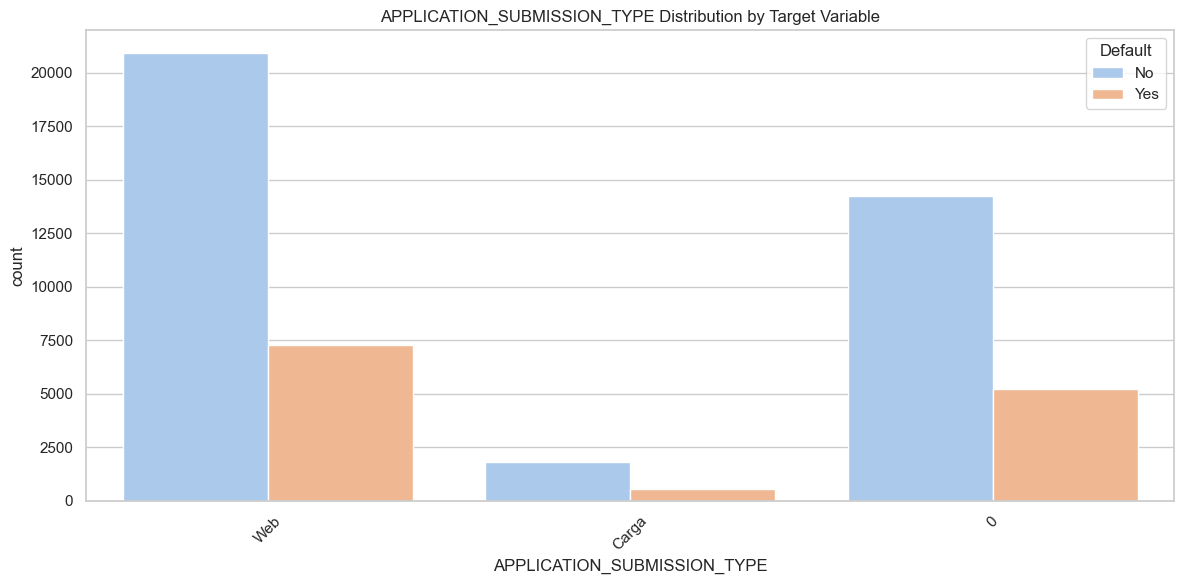

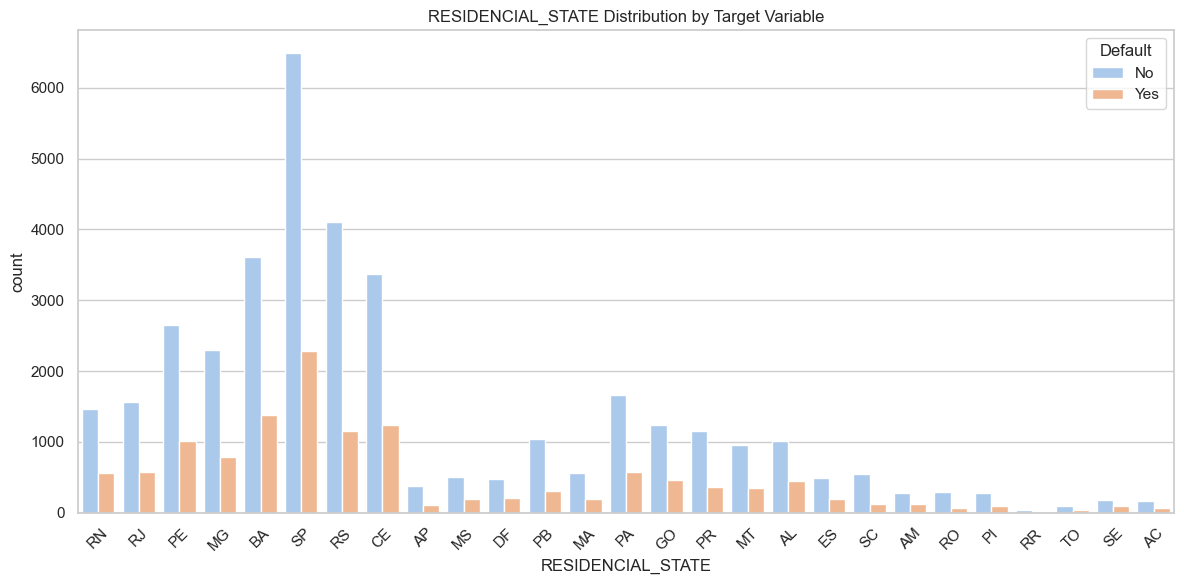

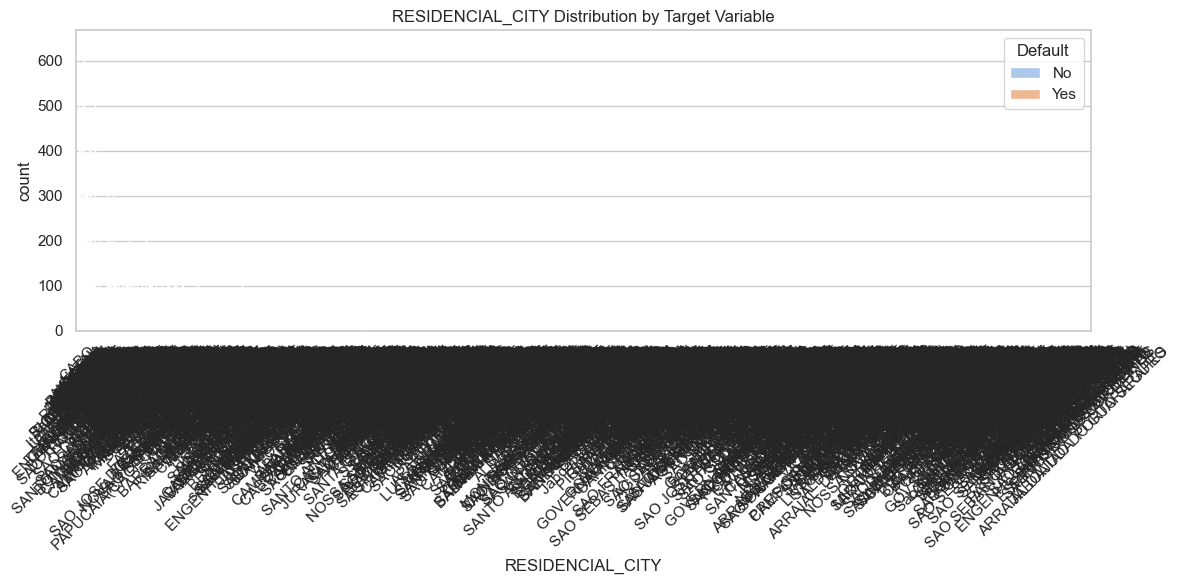

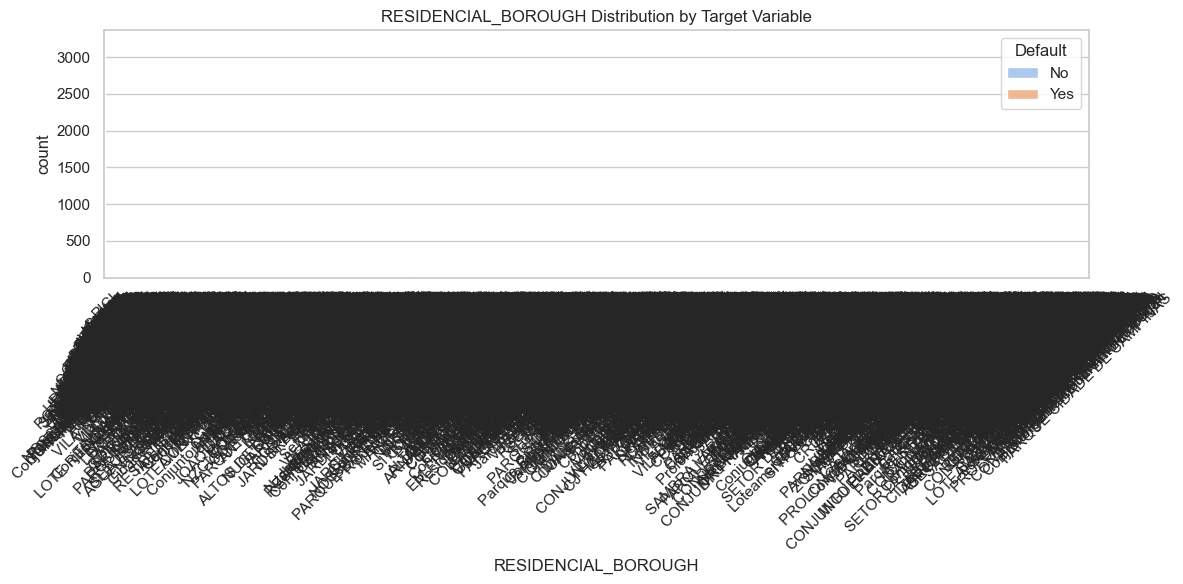

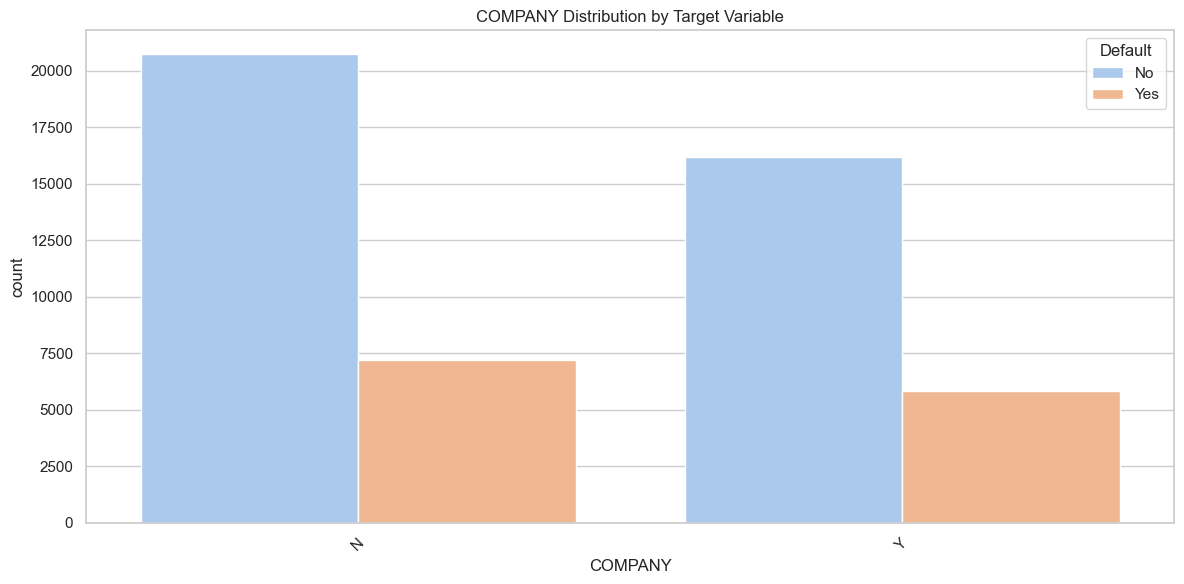

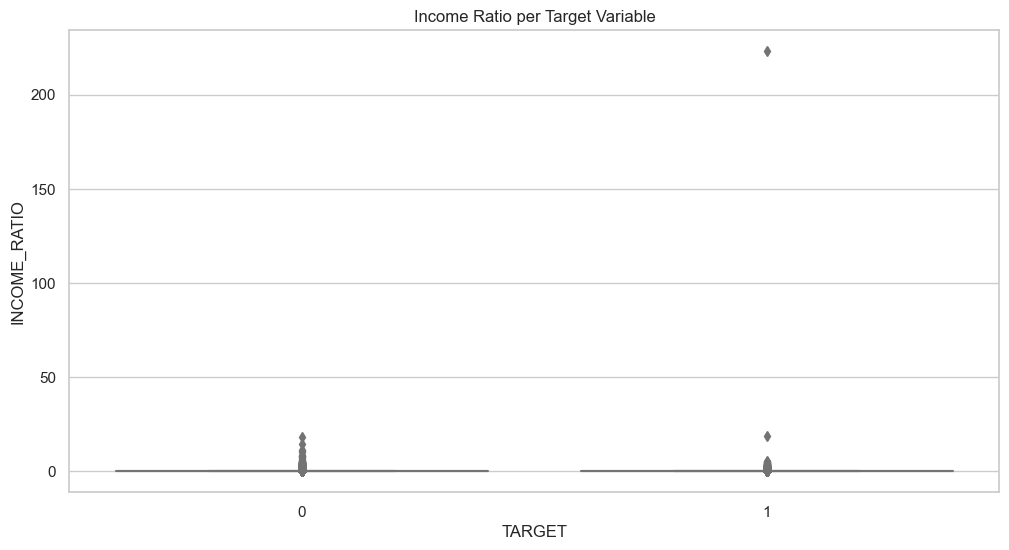

Amount of unique categories by categorical column:
RESIDENCIAL_BOROUGH             14510
PROFESSIONAL_BOROUGH             5056
RESIDENCIAL_CITY                 3529
PROFESSIONAL_CITY                2235
RESIDENCIAL_ZIP_3                 794
PROFESSIONAL_ZIP_3                794
PROFESSIONAL_PHONE_AREA_CODE       86
RESIDENCIAL_STATE                  27
PROFESSIONAL_STATE                 27
APPLICATION_SUBMISSION_TYPE         3
COMPANY                             2
dtype: int64


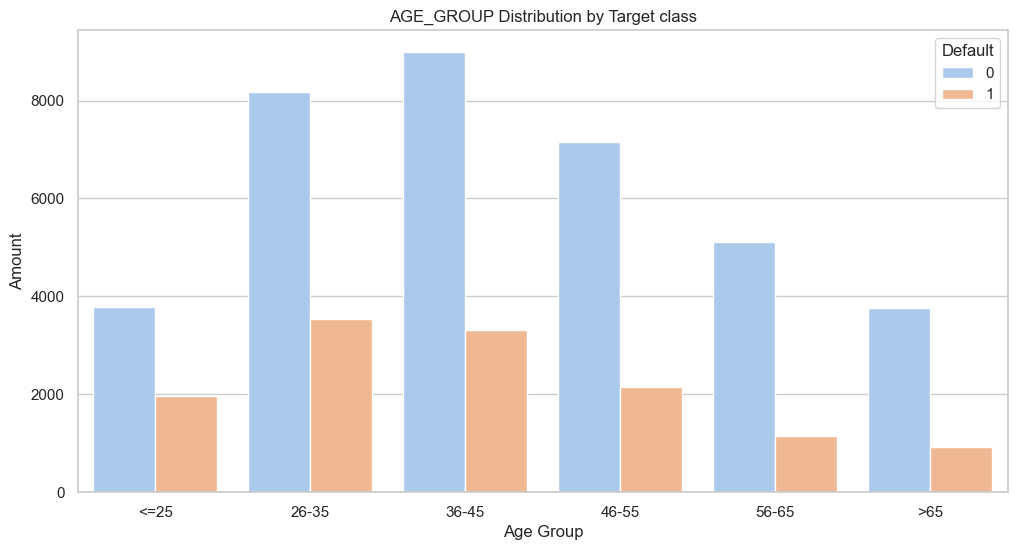

Duplicated columns: []


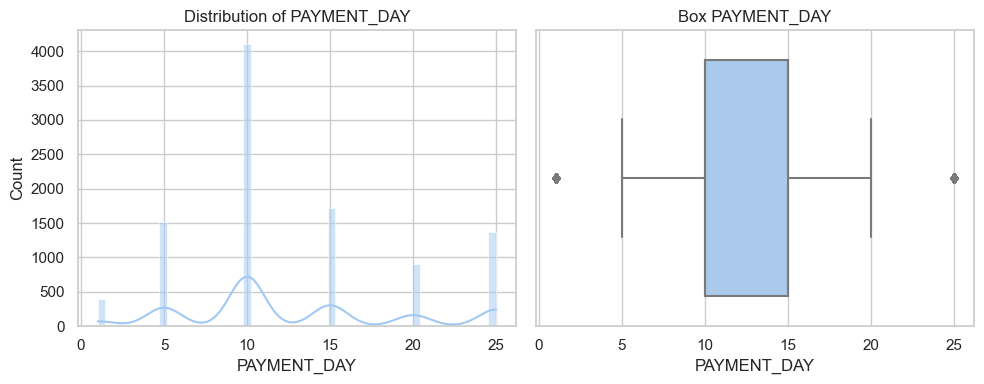

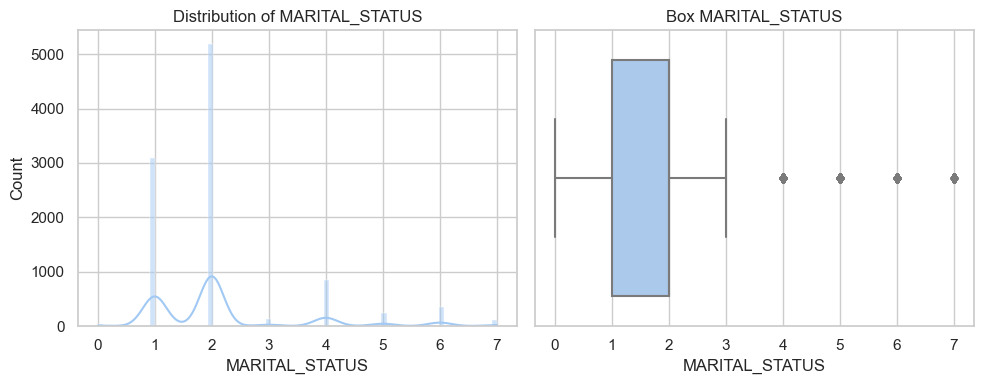

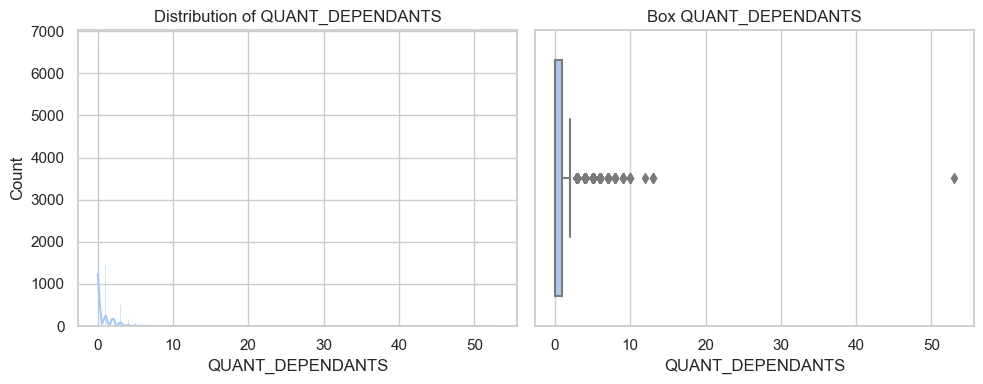

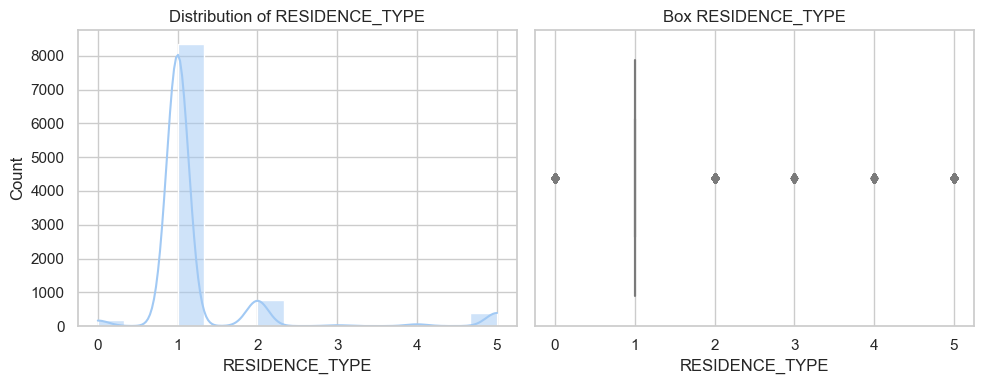

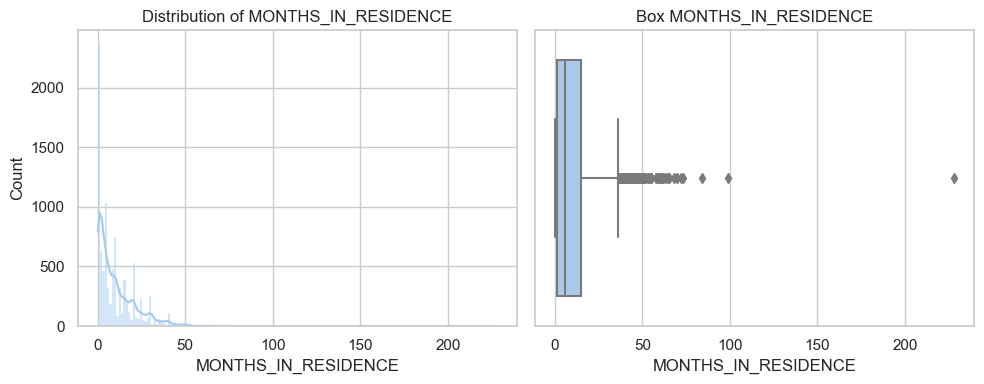

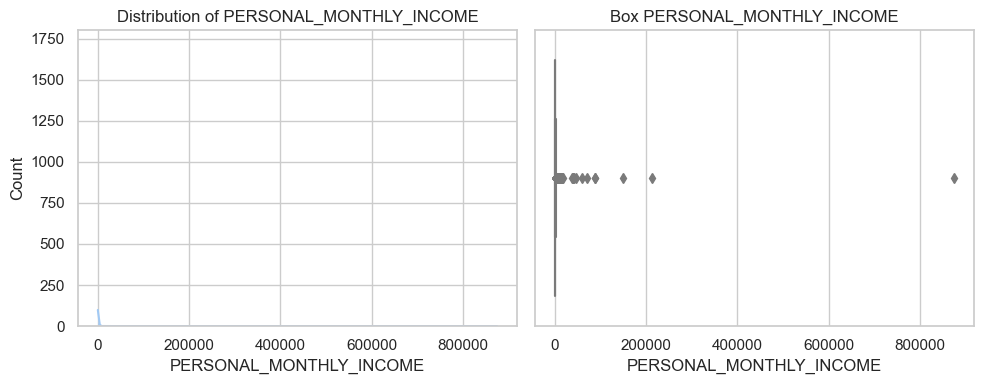

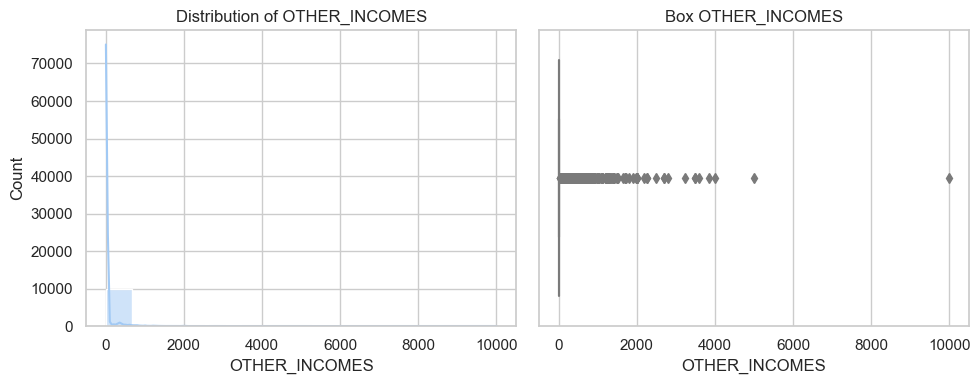

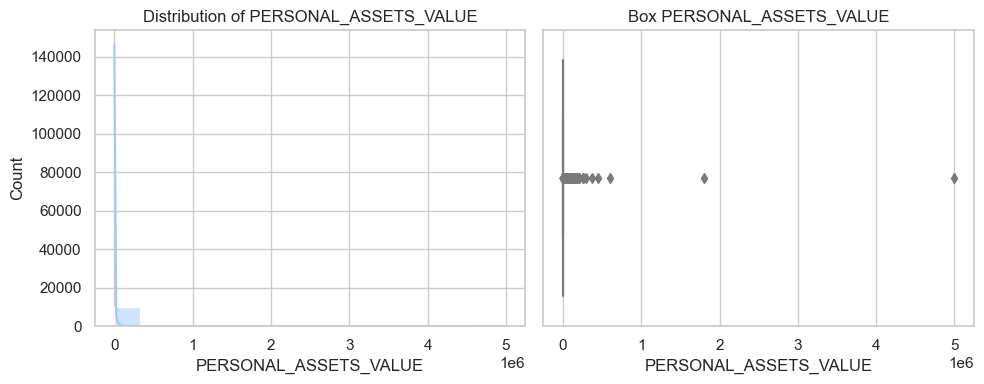

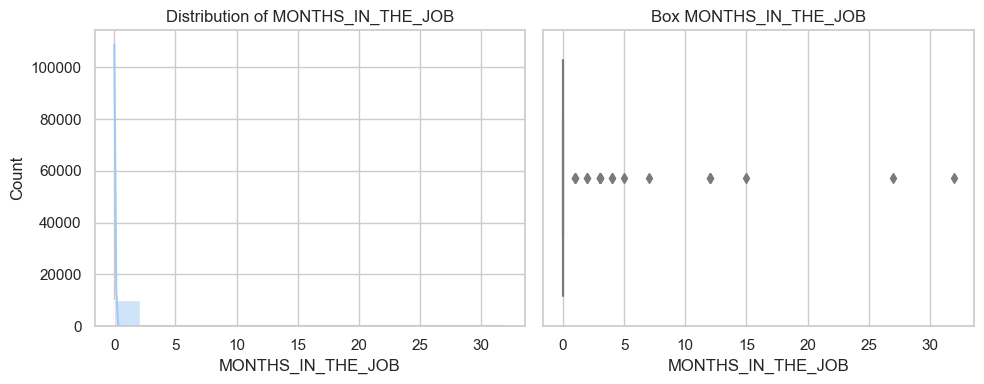

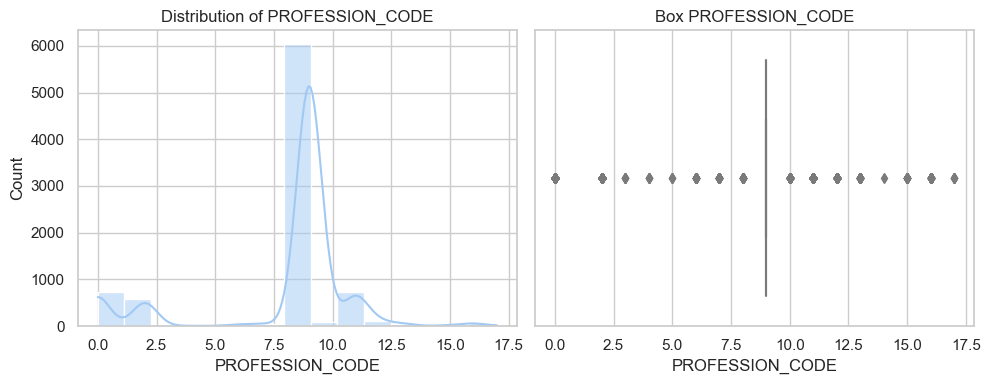

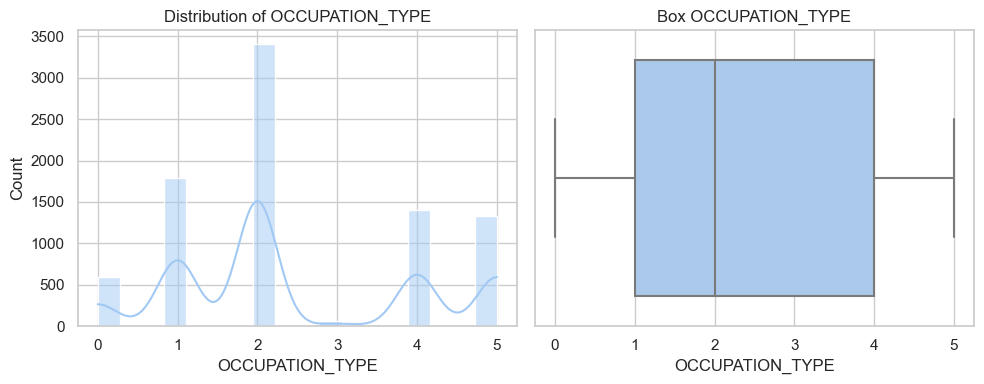

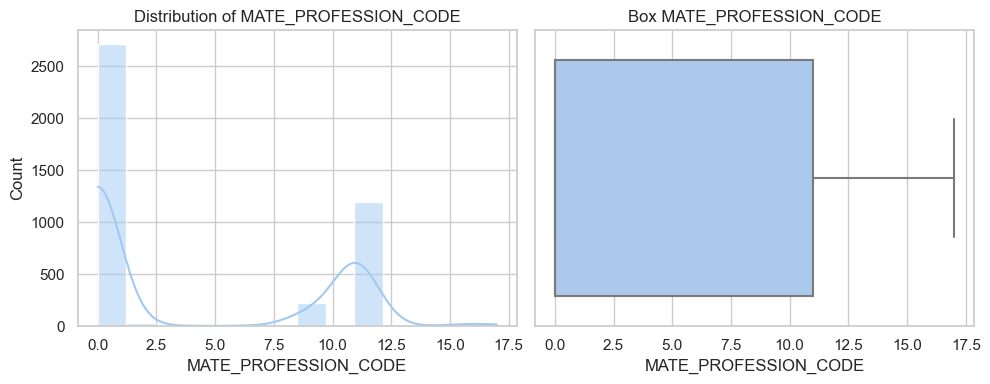

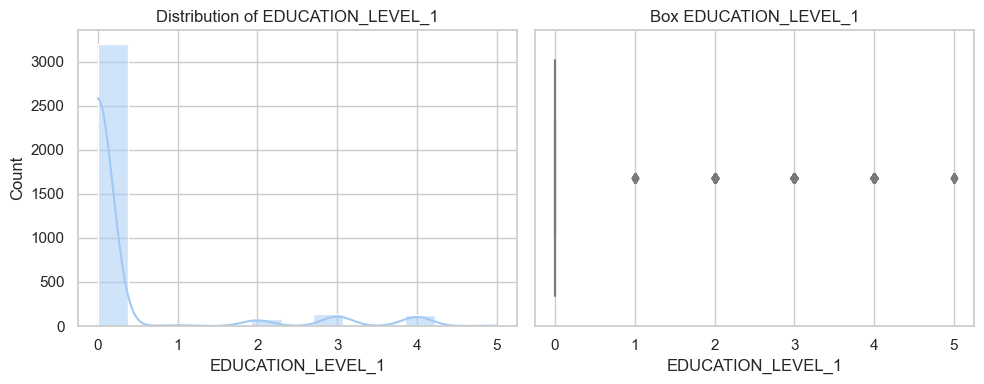

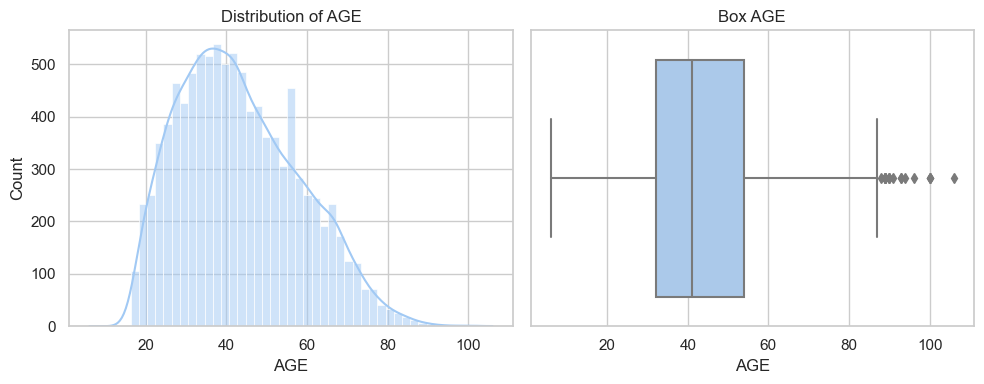

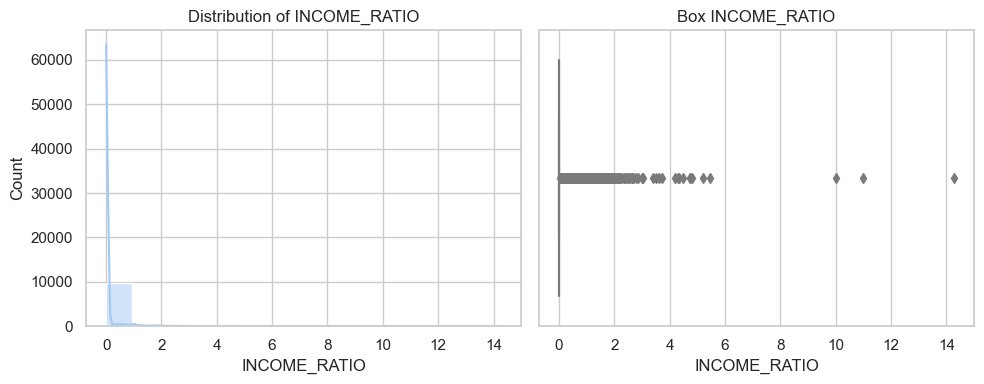

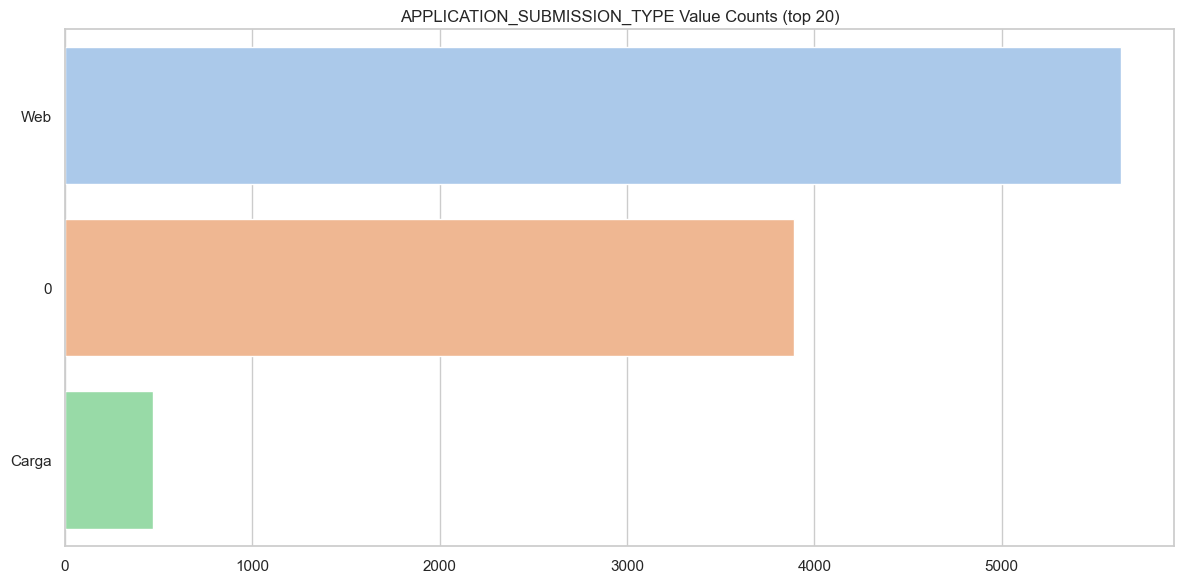

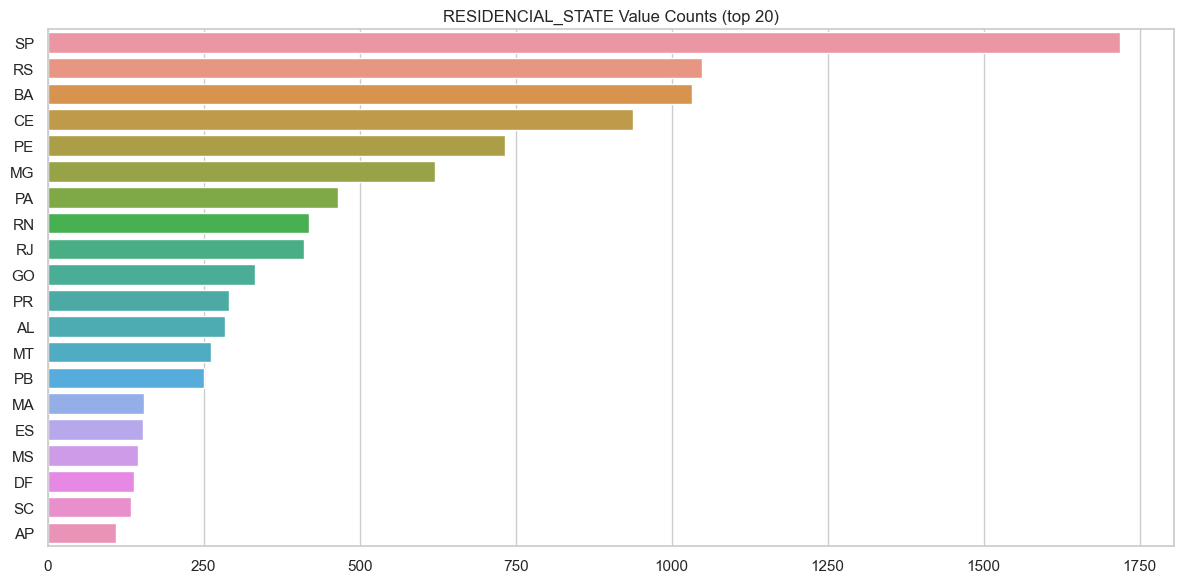

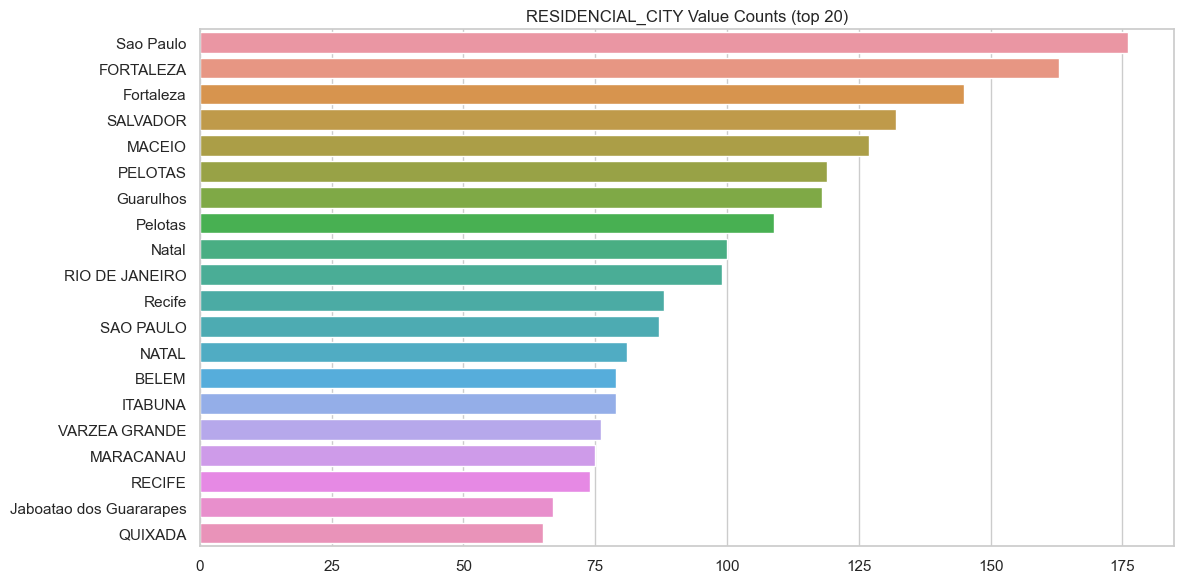

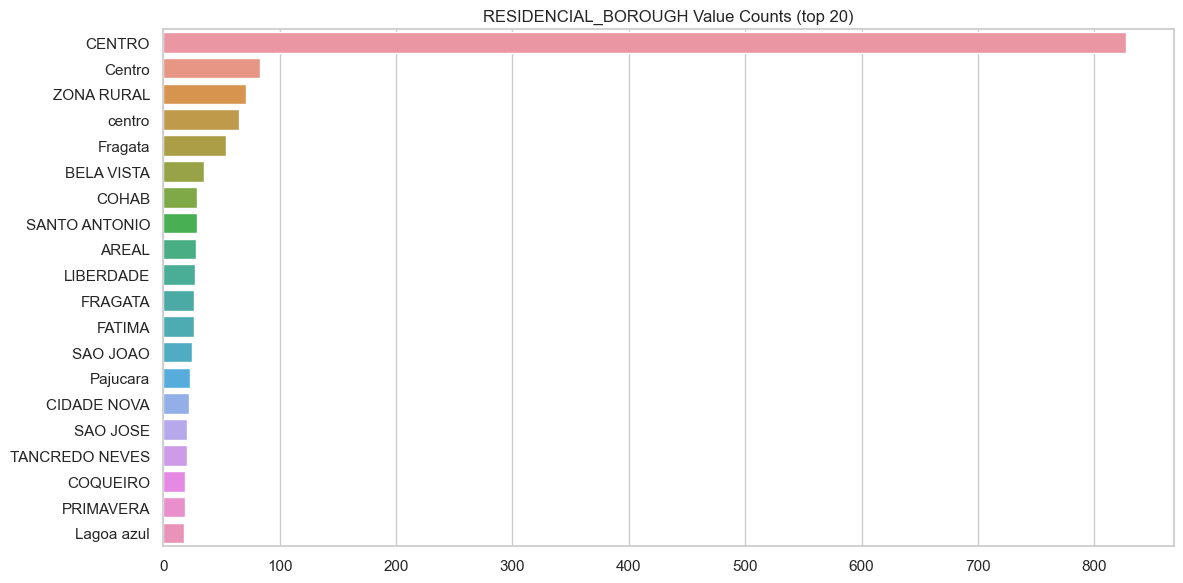

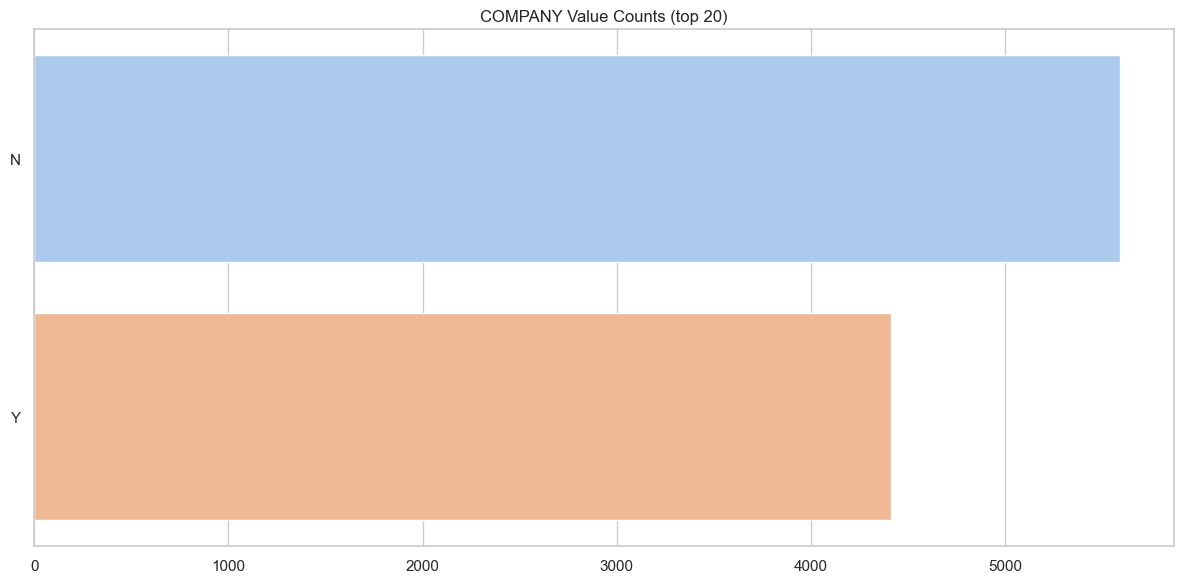

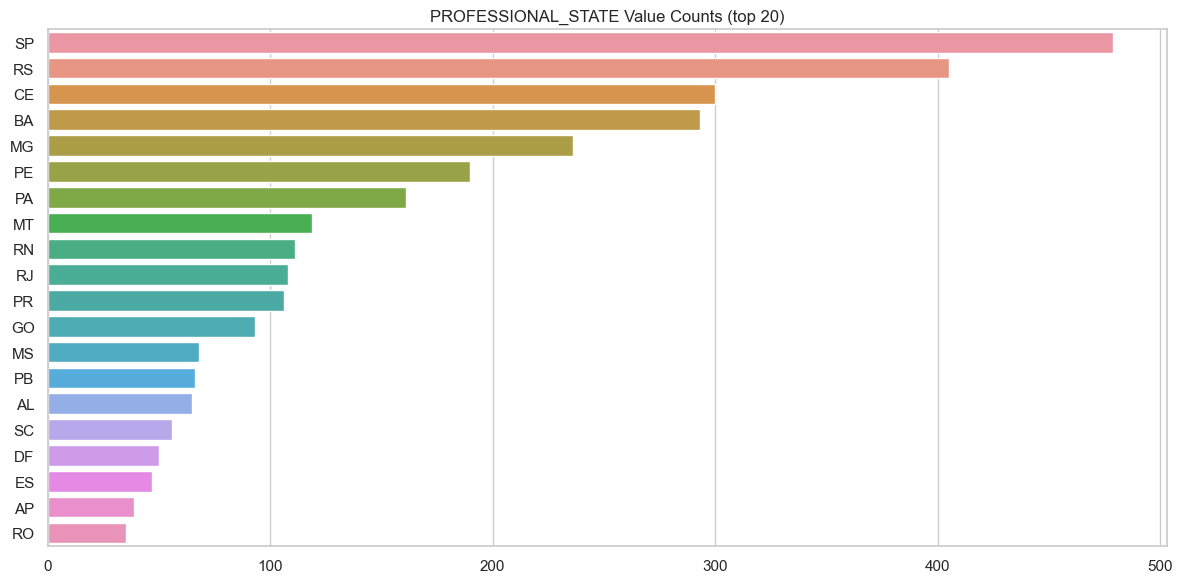

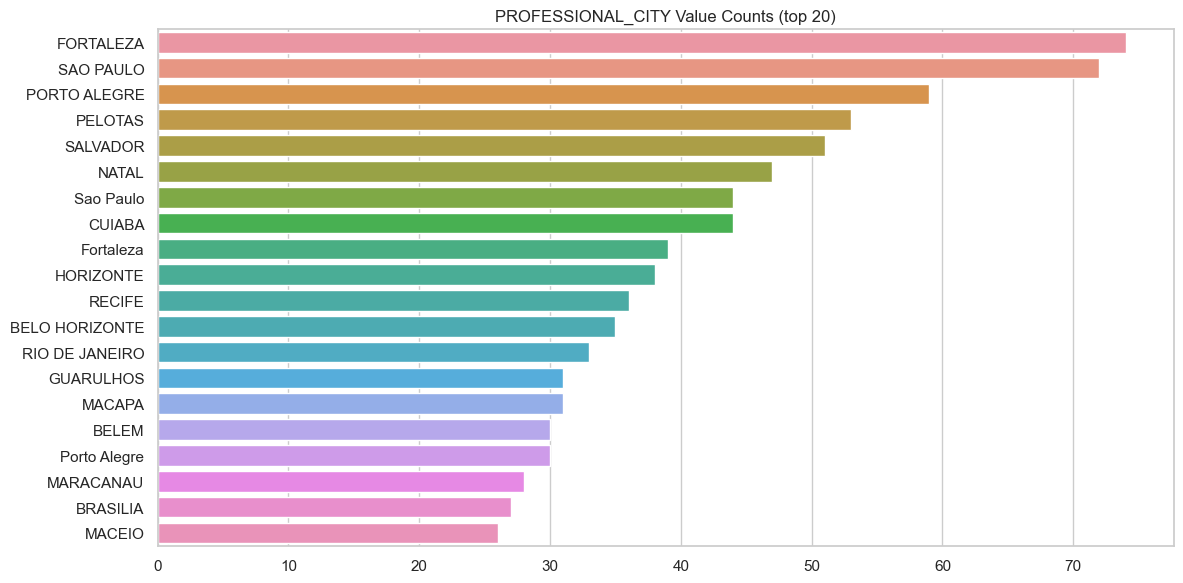

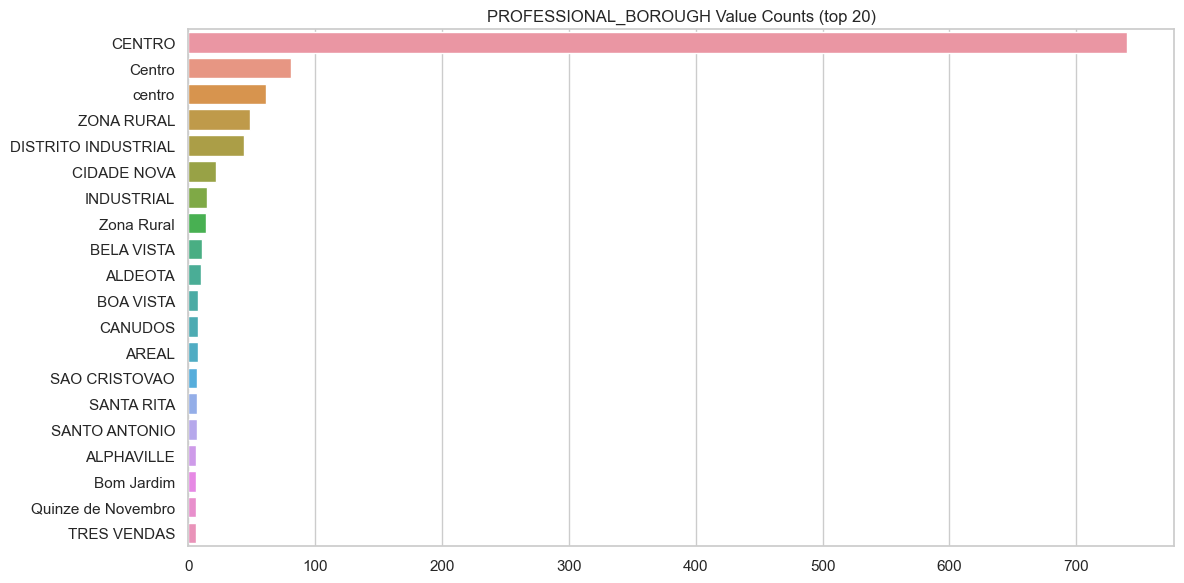

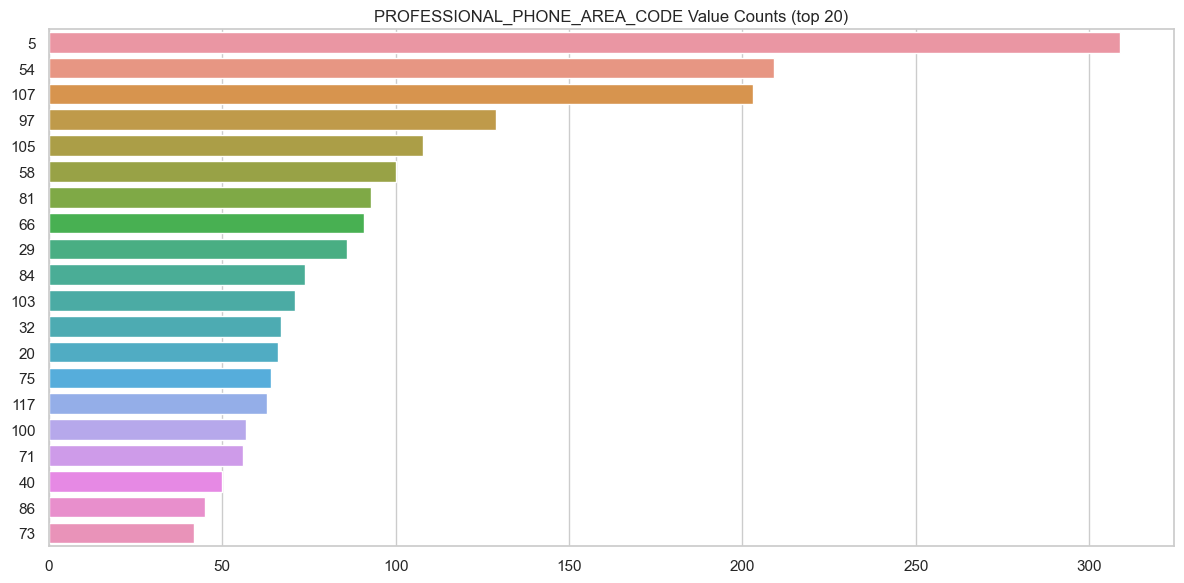

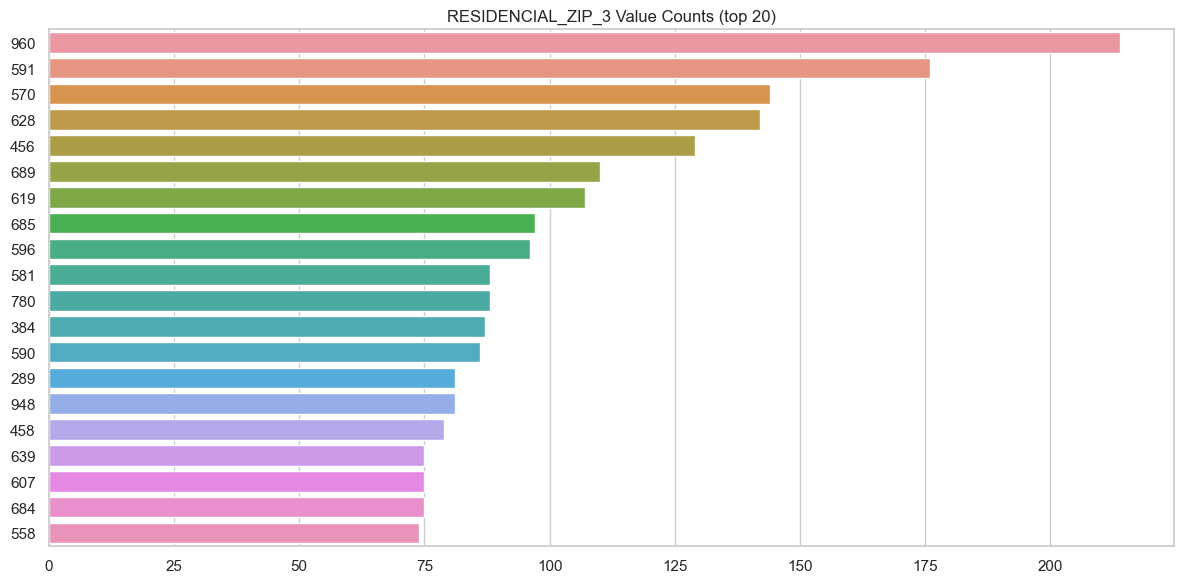

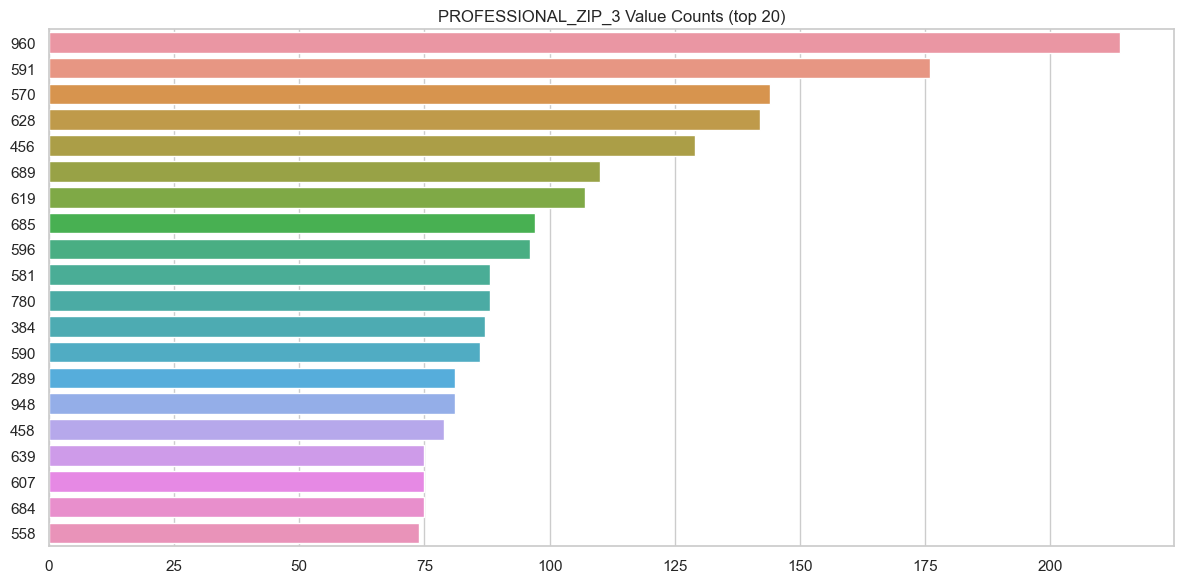

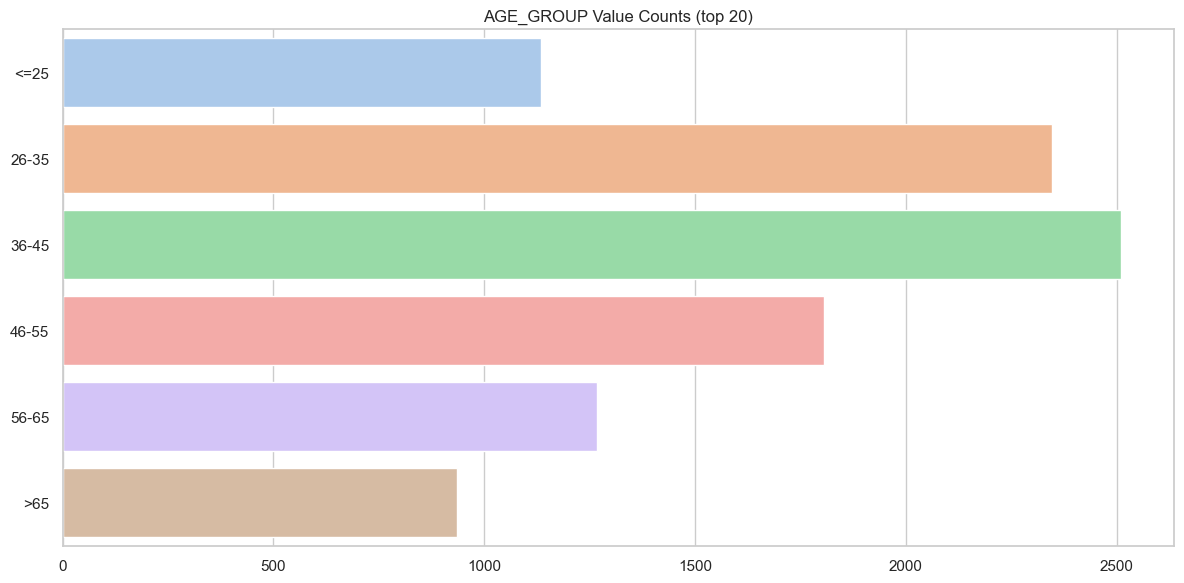

Outlier proportions (beyond 1%-99% for each numeric variable) {'MARITAL_STATUS': 0.0045, 'QUANT_DEPENDANTS': 0.0061, 'MONTHS_IN_RESIDENCE': 0.0085, 'PERSONAL_MONTHLY_INCOME': 0.02, 'OTHER_INCOMES': 0.0092, 'FLAG_DINERS': 0.0014, 'FLAG_AMERICAN_EXPRESS': 0.0026, 'FLAG_OTHER_CARDS': 0.0019, 'QUANT_BANKING_ACCOUNTS': 0.0003, 'QUANT_SPECIAL_BANKING_ACCOUNTS': 0.0003, 'PERSONAL_ASSETS_VALUE': 0.0096, 'MONTHS_IN_THE_JOB': 0.0019, 'PROFESSION_CODE': 0.0085, 'MATE_PROFESSION_CODE': 0.0043, 'EDUCATION_LEVEL_1': 0.0006, 'AGE': 0.0088, 'INCOME_RATIO': 0.01}
Rare categories less than 0.5% frequency in categorical variables: {'RESIDENCIAL_STATE': SE    0.0047
TO    0.0030
RR    0.0010
Name: RESIDENCIAL_STATE, dtype: float64, 'RESIDENCIAL_CITY': MACAPA                   0.0047
PAULO AFONSO             0.0045
ANANINDEUA               0.0045
Salvador                 0.0044
Barueri                  0.0044
                          ...  
SAO PEDRO D ALDEIA       0.0001
rio espera               0.0001
GO

In [14]:
# ANALYSIS AND ADVANCED DESCRIPTIVE STATISTICS

# Style settings
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 6)

#1. Class Balance (TARGET_LABEL_BAD=1)

summary = (
    cleaned_df[target]
    .value_counts()
    .to_frame(name='count')
    .assign(percentage=lambda df: df['count'] / df['count'].sum())
)

print("Distribution of taget variable:")
print(cleaned_df[target].value_counts(normalize=True))

sns.countplot(x=target, data=cleaned_df)
plt.title("Class Distribution of Target Variable")
plt.xlabel("Default (1 = Yes, 0 = No)")
plt.ylabel("Amount of Clients")
plt.show()

#2. Statistics summary for key variables
print("\nResume of statistics for some key variables:")
vars_to_describe = [
    "PERSONAL_MONTHLY_INCOME", "OTHER_INCOMES", "AGE", 
    "MONTHS_IN_THE_JOB", "QUANT_BANKING_ACCOUNTS"
]
display(cleaned_df[vars_to_describe].describe())

#3. Histograms of distributions
for var in vars_to_describe:
    if var in cleaned_df.columns:
        sns.boxplot(x=target, y=var, data=cleaned_df)
        plt.title(f"{var} by Target Variable (Default vs No Default)")
        plt.xlabel("Default")
        plt.ylabel(var)
        plt.show()

#4. Boxplots to detect outliers according to target variable
for var in vars_to_describe:
    if var in cleaned_df.columns:
        sns.boxplot(x=target, y=var, data=cleaned_df)
        plt.title(f"{var} by Target Variable (Default vs No Default)")
        plt.xlabel("Default")
        plt.ylabel(var)
        plt.show() 

#5. Numeric variable correlations
numeric_vars = cleaned_df.select_dtypes(include=["float64", "int64"]).drop(columns=["ID_CLIENT"], errors="ignore")
corr_matrix = numeric_vars.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

#6. Average of variable by target variable
print("Average by target class (Default vs No Default):")
display(cleaned_df.groupby(target)[vars_to_describe].mean())

#7. Display of most frequent binary variables
binary_vars = [c for c in cleaned_df.columns if c.startswith("FLAG_") and cleaned_df[c].nunique() == 2]
for var in binary_vars[:5]: # Limiting to first 5 binary variables for brevity
    if var in cleaned_df.columns:
        sns.countplot(x=var, hue=target, data=cleaned_df)
        plt.title(f"{var} Distribution by Target Variable")
        plt.xlabel(var)
        plt.ylabel("Amount")
        plt.legend(title="Default", labels=["No", "Yes"])
        plt.show()


#8. Categorical variable analysis
# Detecting categorical variables
categorical_cols = cleaned_df.select_dtypes(include="object").columns

#Counts of categories for each categorical variable
for col in categorical_cols:
    print(f"Distribution of {col}:")
    print(cleaned_df[col].value_counts(dropna=False))
    print("\n")

# Display top 5 categorical variables
for col in categorical_cols[:5]:
    sns.countplot(data=cleaned_df, x=col, hue=target)
    plt.title(f"{col} Distribution by Target Variable")
    plt.xticks(rotation=45)
    plt.legend(title="Default", labels=["No", "Yes"])
    plt.tight_layout()
    plt.show()

#9. FEATURE ENGINEERING EXAMPLE: Income Ratio
if "OTHER_INCOMES" in cleaned_df.columns and "PERSONAL_MONTHLY_INCOME" in cleaned_df.columns:
    cleaned_df["INCOME_RATIO"] = cleaned_df["OTHER_INCOMES"] / (cleaned_df["PERSONAL_MONTHLY_INCOME"] + 1e-6)
    sns.boxplot(x=target, y="INCOME_RATIO", data=cleaned_df)
    plt.title("Income Ratio per Target Variable")
    plt.show()


# Categorical variables with high cardinality
print("Amount of unique categories by categorical column:")
print(df_work[categorical_cols].nunique().sort_values(ascending=False))

if "AGE" in cleaned_df.columns:
    cleaned_df["AGE_GROUP"] = pd.cut(
        cleaned_df["AGE"],
        bins=[0, 25, 35, 45, 55, 65, 100],
        labels=["<=25", "26-35", "36-45", "46-55", "56-65", ">65"]
    )
sns.countplot(data=cleaned_df, x="AGE_GROUP", hue=target)
plt.title("AGE_GROUP Distribution by Target class")
plt.xlabel("Age Group")
plt.ylabel("Amount")
plt.legend(title="Default")
plt.show()

duplicated_cols = cleaned_df.columns[cleaned_df.columns.duplicated()]
print("Duplicated columns:", duplicated_cols.tolist())

sample = cleaned_df.sample(10000, random_state=42) if len(cleaned_df) > 15000 else cleaned_df
print

num_cols = cleaned_df.select_dtypes(include="number").columns.tolist()
cat_cols = sample.select_dtypes(exclude=[np.number]).columns.tolist()

#Histograms and boxplots for numeric variables
for col in num_cols:
    series = sample[col].dropna()
    if series.empty or series.nunique() < 5:
        continue
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(series, kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    sns.boxplot(x=series, ax=axes[1])
    axes[1].set_title(f"Box {col}")
    plt.tight_layout()
    plt.show()

#Barplots for categorical variables
for col in cat_cols:
    top_counts = sample[col].value_counts().head(20)
    if top_counts.empty:
        continue
    sns.barplot(x=top_counts.values, y=top_counts.index, orient="h")
    plt.title(f"{col} Value Counts (top 20)")
    plt.tight_layout()
    plt.show()

outliers_info = {}
for col in num_cols:
    q1, q99 = sample[col].quantile([0.01, 0.99])
    mask = (sample[col] < q1) | (sample[col] > q99)
    outliers_info[col] = mask.mean()
outliers_info = {k: v for k, v in outliers_info.items() if v > 0}
print("Outlier proportions (beyond 1%-99% for each numeric variable)", outliers_info)

rare_cats = {}
for col in cat_cols:
    freq = sample[col].value_counts(normalize=True)
    rare = freq[freq < 0.005]
    if not rare.empty:
        rare_cats[col] = rare
print("Rare categories less than 0.5% frequency in categorical variables:", rare_cats)
for col, series in rare_cats.items():
    print(f"\n{col}:\n{series}")